In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dtale
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

## Latar Belakang

### Tren Angka Kemiskinan di Indonesia

Sumber Data: https://www.bps.go.id/subject/23/kemiskinan-dan-ketimpangan.html#subjekViewTab3

In [189]:
pov_percent_data = pd.read_excel('Kemiskinan Indonesia/Data Persentase Kemiskinan Nasional 2016-2021.xlsx')
pov_percent_data.head()

,Provinsi,2016,2017,2018,2019,2020,2021,Rata-Rata
0,ACEH,16.43,15.92,15.68,15.01,15.43,15.33,15.633333
1,SUMATERA UTARA,10.27,9.28,8.94,8.63,9.14,9.01,9.211667
2,SUMATERA BARAT,7.14,6.75,6.55,6.29,6.56,6.63,6.653333
3,RIAU,7.67,7.41,7.21,6.90,7.04,7.12,7.225000
4,JAMBI,8.37,7.90,7.85,7.51,7.97,8.09,7.948333


In [190]:
pov_percent_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Provinsi   35 non-null     object 
 1   2016       35 non-null     float64
 2   2017       35 non-null     float64
 3   2018       35 non-null     float64
 4   2019       35 non-null     float64
 5   2020       35 non-null     float64
 6   2021       35 non-null     float64
 7   Rata-Rata  35 non-null     float64
dtypes: float64(7), object(1)
memory usage: 2.3+ KB


In [191]:
pov_percent_data.describe().T

,count,mean,std,min,25%,50%,75%,max
2016,35.0,11.339429,6.039573,3.750,6.700,10.270000,13.975000,28.40
2017,35.0,10.927429,5.703284,3.780,6.595,9.480000,13.660000,27.76
2018,35.0,10.580571,5.621243,3.550,6.585,8.940000,13.350000,27.43
2019,35.0,10.207714,5.441149,3.420,6.390,8.630000,12.870000,26.55
2020,35.0,10.788000,5.333811,4.450,6.805,9.140000,13.020000,26.80
2021,35.0,10.744571,5.323675,4.530,6.775,9.010000,12.920000,26.86
Rata-Rata,35.0,10.764619,5.570064,3.985,6.680,9.211667,13.244167,27.30


In [192]:
pov_percent_data.describe(include='object').T

,count,unique,top,freq
Provinsi,35,35,INDONESIA,1


In [193]:
pov_percent_province = pov_percent_data.iloc[:-1, :-1].set_index('Provinsi').T
pov_percent_province

Provinsi,ACEH,SUMATERA UTARA,SUMATERA BARAT,RIAU,JAMBI,SUMATERA SELATAN,BENGKULU,LAMPUNG,KEP. BANGKA BELITUNG,KEP. RIAU,...,SULAWESI UTARA,SULAWESI TENGAH,SULAWESI SELATAN,SULAWESI TENGGARA,GORONTALO,SULAWESI BARAT,MALUKU,MALUKU UTARA,PAPUA BARAT,PAPUA
2016,16.43,10.27,7.14,7.67,8.37,13.39,17.03,13.86,5.04,5.84,...,8.20,14.09,9.24,12.77,17.63,11.19,19.26,6.41,24.88,28.40
2017,15.92,9.28,6.75,7.41,7.90,13.10,15.59,13.04,5.30,6.13,...,7.90,14.22,9.48,11.97,17.14,11.18,18.29,6.44,23.12,27.76
2018,15.68,8.94,6.55,7.21,7.85,12.82,15.41,13.01,4.77,5.83,...,7.59,13.69,8.87,11.32,15.83,11.22,17.85,6.62,22.66,27.43
2019,15.01,8.63,6.29,6.90,7.51,12.56,14.91,12.30,4.50,5.80,...,7.51,13.18,8.56,11.04,15.31,10.95,17.65,6.91,21.51,26.55
2020,15.43,9.14,6.56,7.04,7.97,12.98,15.30,12.76,4.89,6.13,...,7.78,13.06,8.99,11.69,15.59,11.50,17.99,6.97,21.70,26.80
2021,15.33,9.01,6.63,7.12,8.09,12.84,15.22,12.62,4.90,6.12,...,7.77,13.00,8.78,11.66,15.61,11.29,17.87,6.89,21.84,26.86


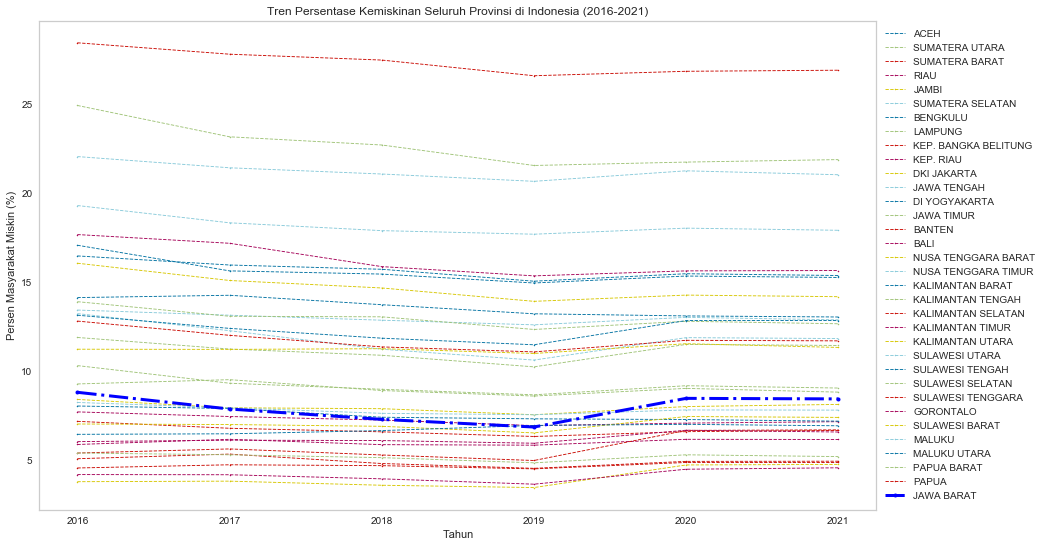

In [194]:
fig, ax = plt.subplots(1,1,figsize=(15,9))

pov_percent_province.loc[:, pov_percent_province.columns != 'JAWA BARAT'].plot(kind='line', 
                                                                                         marker='.',
                                                                                         linestyle='--',
                                                                                         linewidth=0.9,
                                                                                         markersize=3,
                                                                                         ax=ax)

pov_percent_province.loc[:, pov_percent_province.columns == 'JAWA BARAT'].plot(kind='line', 
                                                                                         marker='o',
                                                                                         linestyle='-.',
                                                                                         linewidth=3, 
                                                                                         markersize=4,
                                                                                         color='blue',
                                                                                         ax=ax)
plt.title('Tren Persentase Kemiskinan Seluruh Provinsi di Indonesia (2016-2021)')
plt.xlabel('Tahun')
plt.ylabel('Persen Masyarakat Miskin (%)')
plt.grid()
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

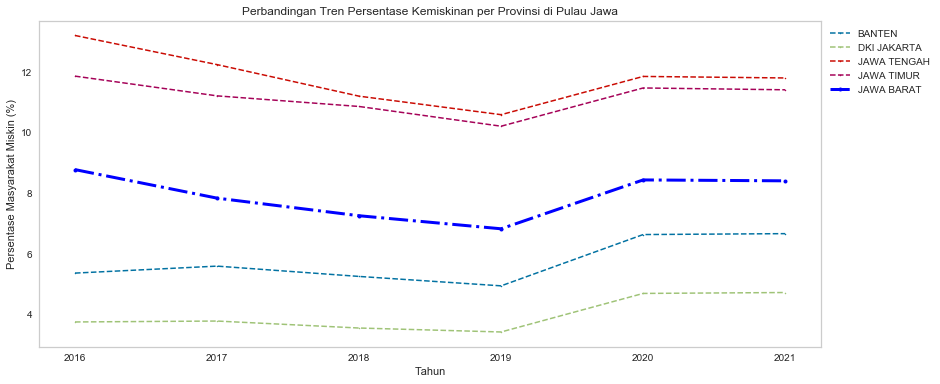

In [195]:
fig, ax = plt.subplots(1,1,figsize=(14,6))

pov_java = pov_percent_data.iloc[:,:-1].set_index('Provinsi').T[['BANTEN', 'DKI JAKARTA', 'JAWA TENGAH','JAWA TIMUR']]

pov_java.plot(kind='line', marker='.', linestyle='--', linewidth=1.5, markersize=3, ax=ax)

pov_percent_province.loc[:, pov_percent_province.columns == 'JAWA BARAT'].plot(kind='line', 
                                                                                         marker='o',
                                                                                         linestyle='-.',
                                                                                         linewidth=3, 
                                                                                         markersize=4,
                                                                                         color='blue',
                                                                                         ax=ax)

plt.title('Perbandingan Tren Persentase Kemiskinan per Provinsi di Pulau Jawa')
plt.xlabel('Tahun')
plt.ylabel('Persentase Masyarakat Miskin (%)')
plt.grid()
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

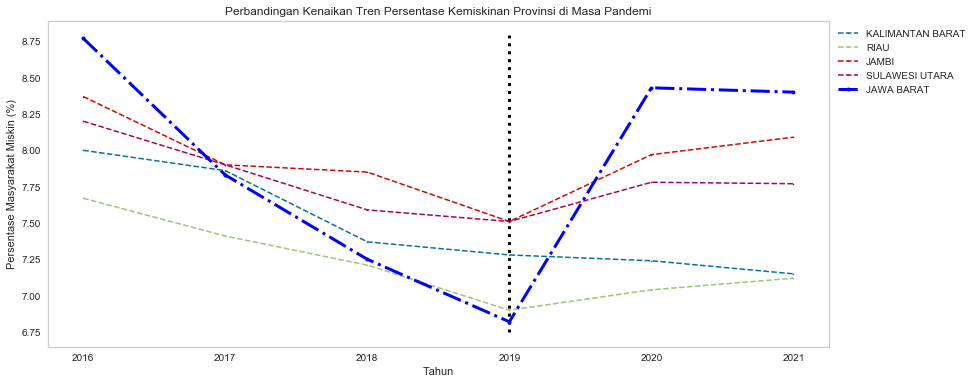

In [196]:
fig, ax = plt.subplots(1,1,figsize=(14,6))

pov_sample = pov_percent_data.iloc[:,:-1].set_index('Provinsi').T[['KALIMANTAN BARAT', 'RIAU', 'JAMBI', 'SULAWESI UTARA']]

pov_sample.plot(kind='line', marker='.', linestyle='--', linewidth=1.5, markersize=3, ax=ax)

pov_percent_province.loc[:, pov_percent_province.columns == 'JAWA BARAT'].plot(kind='line', 
                                                                                         marker='o',
                                                                                         linestyle='-.',
                                                                                         linewidth=3, 
                                                                                         markersize=4,
                                                                                         color='blue',
                                                                                         ax=ax)

plt.vlines(x = 2019, color = 'black', linestyle = ':', linewidth=3, ymin=6.75, ymax=8.79)
plt.title('Perbandingan Kenaikan Tren Persentase Kemiskinan Provinsi di Masa Pandemi')
plt.xlabel('Tahun')
plt.ylabel('Persentase Masyarakat Miskin (%)')
plt.grid()
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

Meskipun performa Jawa Barat masih relatif lebih baik dibandingkan provinsi tetangga seperti Jawa Tengah dan Jawa Timur, namun terdapat hal lain yang menarik. Dari grafik, terlihat bahwa tren kemiskinan di Jawa Barat mengalami peningkatan yang relatif cukup tajam dibandingkan dengan daerah-daerah lain di Indonesia saat pandemi melanda pada akhir tahun 2019.

### Tren Angka Kemiskinan di Jawa Barat

Sumber Data: https://drive.google.com/drive/folders/1zs42MkAcpfS6qP_wc3Eyjo3qU7ZOv0iB

In [197]:
pov_percent_jabar = pd.read_csv('Kemiskinan Jabar/bps-od_persentase_penduduk_miskin_berdasarkan_kabupatenkota_data.csv')
pov_percent_jabar.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,persentase_penduduk,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,9.97,PERSEN,2010
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,10.65,PERSEN,2010
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,14.32,PERSEN,2010
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,9.30,PERSEN,2010
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,13.94,PERSEN,2010


In [198]:
pov_percent_jabar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   292 non-null    int64  
 1   kode_provinsi        292 non-null    int64  
 2   nama_provinsi        292 non-null    object 
 3   kode_kabupaten_kota  292 non-null    int64  
 4   nama_kabupaten_kota  292 non-null    object 
 5   persentase_penduduk  292 non-null    float64
 6   satuan               292 non-null    object 
 7   tahun                292 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 18.4+ KB


In [199]:
pov_percent_jabar.describe().T

,count,mean,std,min,25%,50%,75%,max
id,292.0,146.500000,84.437354,1.00,73.7500,146.500,219.2500,292.00
kode_provinsi,292.0,32.000000,0.000000,32.00,32.0000,32.000,32.0000,32.00
kode_kabupaten_kota,292.0,3231.561644,31.472559,3201.00,3207.0000,3214.000,3273.0000,3279.00
persentase_penduduk,292.0,9.505514,3.511846,2.07,7.1175,9.345,11.9925,20.71
tahun,292.0,2015.051370,3.164575,2010.00,2012.0000,2015.000,2018.0000,2020.00


In [200]:
pov_percent_jabar.describe(include='object').T

,count,unique,top,freq
nama_provinsi,292,1,JAWA BARAT,292
nama_kabupaten_kota,292,27,KOTA BANDUNG,11
satuan,292,1,PERSEN,292


In [201]:
pov_percent_jabar['nama_kabupaten_kota'].unique()

array(['KABUPATEN BOGOR', 'KABUPATEN SUKABUMI', 'KABUPATEN CIANJUR',
       'KABUPATEN BANDUNG', 'KABUPATEN GARUT', 'KABUPATEN TASIKMALAYA',
       'KABUPATEN CIAMIS', 'KABUPATEN KUNINGAN', 'KABUPATEN CIREBON',
       'KABUPATEN MAJALENGKA', 'KABUPATEN SUMEDANG',
       'KABUPATEN INDRAMAYU', 'KABUPATEN SUBANG', 'KABUPATEN PURWAKARTA',
       'KABUPATEN KARAWANG', 'KABUPATEN BEKASI',
       'KABUPATEN BANDUNG BARAT', 'KOTA BOGOR', 'KOTA SUKABUMI',
       'KOTA BANDUNG', 'KOTA CIREBON', 'KOTA BEKASI', 'KOTA DEPOK',
       'KOTA CIMAHI', 'KOTA TASIKMALAYA', 'KOTA BANJAR',
       'KABUPATEN PANGANDARAN'], dtype=object)

In [202]:
pov_percent_jabar_pivot = pov_percent_jabar.loc[pov_percent_jabar['tahun']>2015][['nama_kabupaten_kota', 'persentase_penduduk',
                                                                                  'tahun']]
pov_percent_jabar_pivot

,nama_kabupaten_kota,persentase_penduduk,tahun
157,KABUPATEN BOGOR,8.83,2016
158,KABUPATEN SUKABUMI,8.13,2016
159,KABUPATEN CIANJUR,11.62,2016
160,KABUPATEN BANDUNG,7.61,2016
161,KABUPATEN GARUT,11.64,2016
...,...,...,...
287,KOTA BEKASI,4.38,2020
288,KOTA DEPOK,2.45,2020
289,KOTA CIMAHI,5.11,2020
290,KOTA TASIKMALAYA,12.97,2020


In [203]:
len(pov_percent_jabar_pivot['nama_kabupaten_kota'].unique())

27

In [204]:
pov_percent_jabar_pivot2 = pov_percent_jabar_pivot.pivot(index='nama_kabupaten_kota', columns='tahun', 
                                                         values='persentase_penduduk')

pov_percent_jabar_pivot2['Mean'] = (pov_percent_jabar_pivot2[2016] + pov_percent_jabar_pivot2[2017] 
                                    + pov_percent_jabar_pivot2[2018] + pov_percent_jabar_pivot2[2019] 
                                    + pov_percent_jabar_pivot2[2020])/5

pov_percent_jabar_pivot2 = pov_percent_jabar_pivot2.sort_values('Mean', ascending=True)
pov_percent_jabar_pivot2

tahun,2016,2017,2018,2019,2020,Mean
nama_kabupaten_kota,,,,,,
KOTA DEPOK,2.34,2.34,2.14,2.07,2.45,2.268
KOTA BANDUNG,4.32,4.17,3.57,3.38,3.99,3.886
KOTA BEKASI,5.06,4.79,4.11,3.81,4.38,4.430
KABUPATEN BEKASI,4.92,4.73,4.37,4.01,4.82,4.570
KOTA CIMAHI,5.92,5.76,4.94,4.39,5.11,5.224
KOTA BANJAR,7.01,7.06,5.70,5.50,6.09,6.272
KOTA BOGOR,7.29,7.11,5.93,5.77,6.68,6.556
KABUPATEN BANDUNG,7.61,7.36,6.65,5.94,6.91,6.894
KABUPATEN SUKABUMI,8.13,8.04,6.76,6.22,7.09,7.248


In [205]:
pov_percent_jabar_pivot2.iloc[:, :-1].T

nama_kabupaten_kota,KOTA DEPOK,KOTA BANDUNG,KOTA BEKASI,KABUPATEN BEKASI,KOTA CIMAHI,KOTA BANJAR,KOTA BOGOR,KABUPATEN BANDUNG,KABUPATEN SUKABUMI,KABUPATEN CIAMIS,...,KABUPATEN SUMEDANG,KABUPATEN GARUT,KABUPATEN TASIKMALAYA,KABUPATEN CIANJUR,KABUPATEN BANDUNG BARAT,KABUPATEN MAJALENGKA,KABUPATEN CIREBON,KABUPATEN KUNINGAN,KABUPATEN INDRAMAYU,KOTA TASIKMALAYA
tahun,,,,,,,,,,,,,,,,,,,,,
2016,2.34,4.32,5.06,4.92,5.92,7.01,7.29,7.61,8.13,8.42,...,10.57,11.64,11.24,11.62,11.71,12.85,13.49,13.59,13.95,15.60
2017,2.34,4.17,4.79,4.73,5.76,7.06,7.11,7.36,8.04,8.20,...,10.53,11.27,10.84,11.41,11.49,12.60,12.97,13.27,13.67,14.80
2018,2.14,3.57,4.11,4.37,4.94,5.70,5.93,6.65,6.76,7.22,...,9.76,9.27,9.85,9.81,10.06,10.79,10.70,12.22,11.89,12.71
2019,2.07,3.38,3.81,4.01,4.39,5.50,5.77,5.94,6.22,6.65,...,9.05,8.98,9.12,9.15,9.38,10.06,9.94,11.41,11.11,11.60
2020,2.45,3.99,4.38,4.82,5.11,6.09,6.68,6.91,7.09,7.62,...,10.26,9.98,10.34,10.36,10.49,11.43,11.24,12.82,12.70,12.97


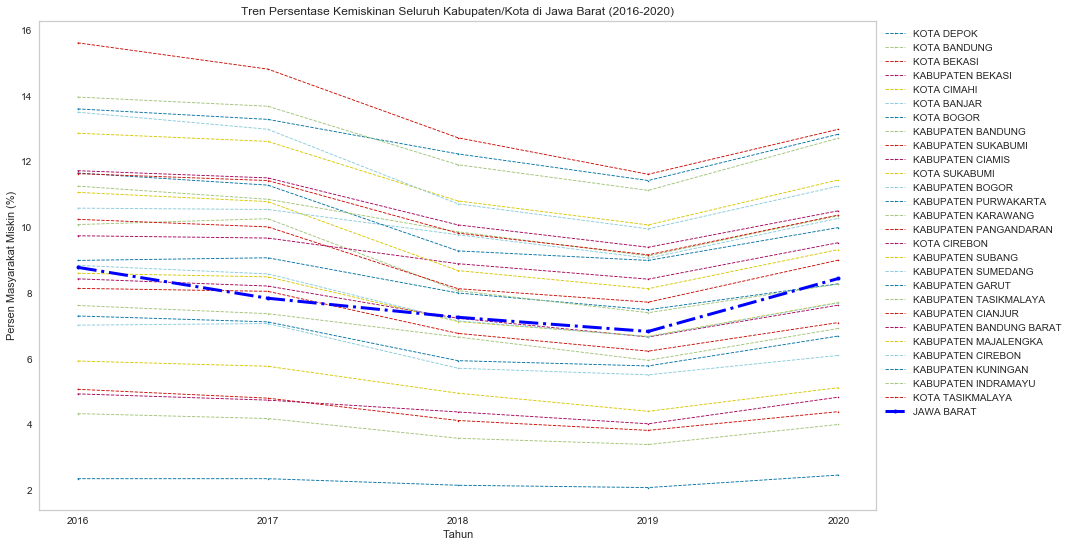

In [206]:
fig, ax = plt.subplots(1,1,figsize=(15,9))

pov_percent_jabar_pivot2.iloc[:, :-1].T.plot(kind='line', marker='.', linestyle='--', linewidth=0.9, markersize=3, ax=ax)

pov_percent_province.iloc[:-1].loc[:, pov_percent_province.columns == 'JAWA BARAT'].plot(kind='line', 
                                                                                         marker='o',
                                                                                         linestyle='-.',
                                                                                         linewidth=3, 
                                                                                         markersize=4,
                                                                                         color='blue',
                                                                                         ax=ax)

plt.title('Tren Persentase Kemiskinan Seluruh Kabupaten/Kota di Jawa Barat (2016-2020)')
plt.xlabel('Tahun')
plt.ylabel('Persen Masyarakat Miskin (%)')
plt.xticks(np.arange(2016,2021,1))
plt.grid()
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

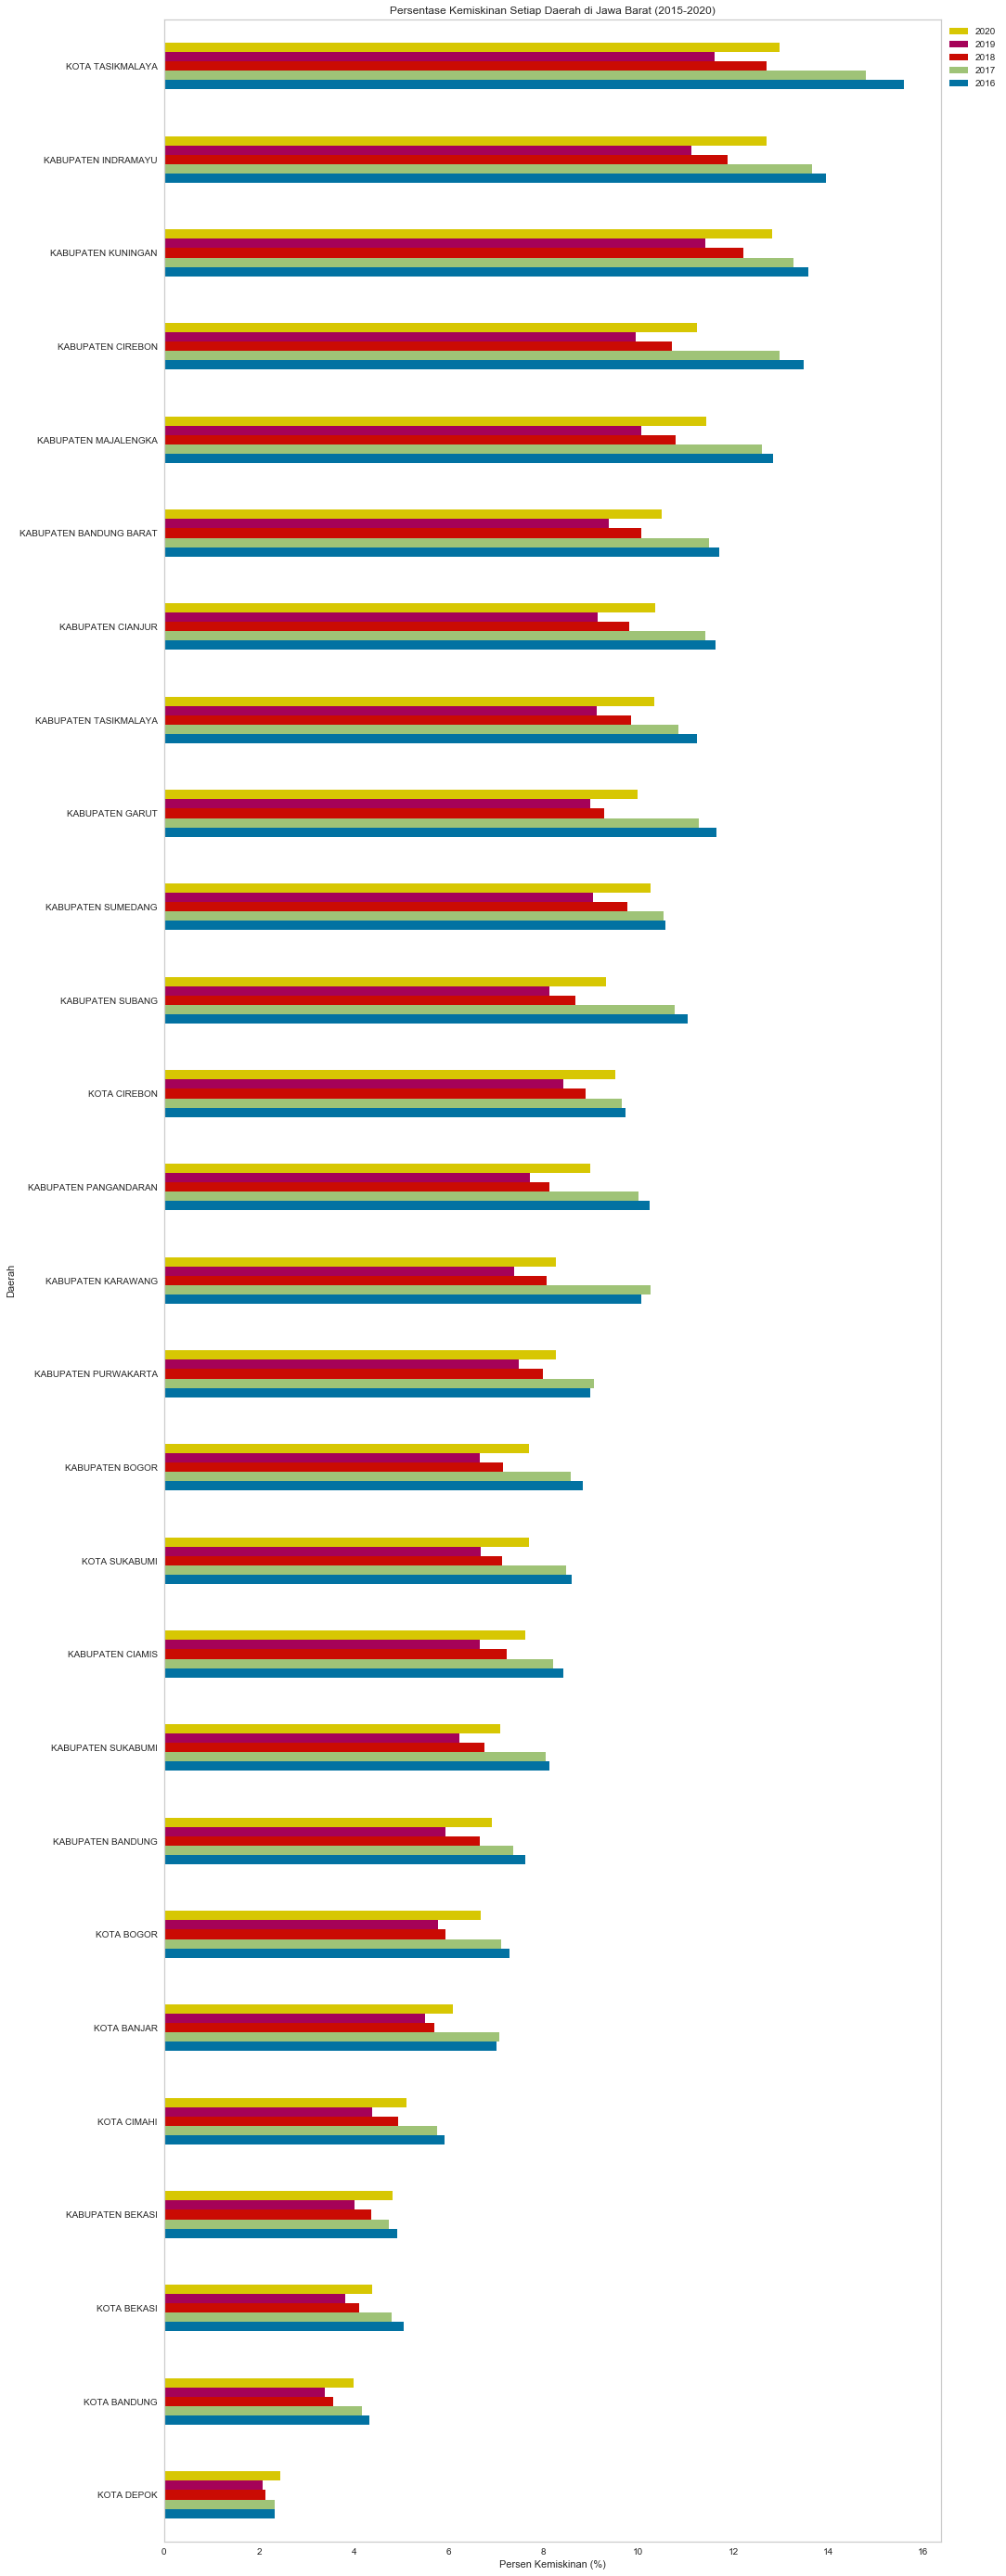

In [207]:
fig, ax = plt.subplots(1, 1, figsize=(15, 50))

pov_percent_jabar_pivot2.iloc[:, :-1].plot(kind='barh', ax=ax)

handles,labels = ax.get_legend_handles_labels()

handles = [handles[4], handles[3], handles[2], handles[1], handles[0]]
labels = [labels[4], labels[3], labels[2], labels[1], labels[0]]

plt.grid()
plt.title('Persentase Kemiskinan Setiap Daerah di Jawa Barat (2015-2020)')
plt.xlabel('Persen Kemiskinan (%)')
plt.ylabel('Daerah')
plt.legend(handles=handles, labels=labels, loc="upper left", bbox_to_anchor=(1,1))

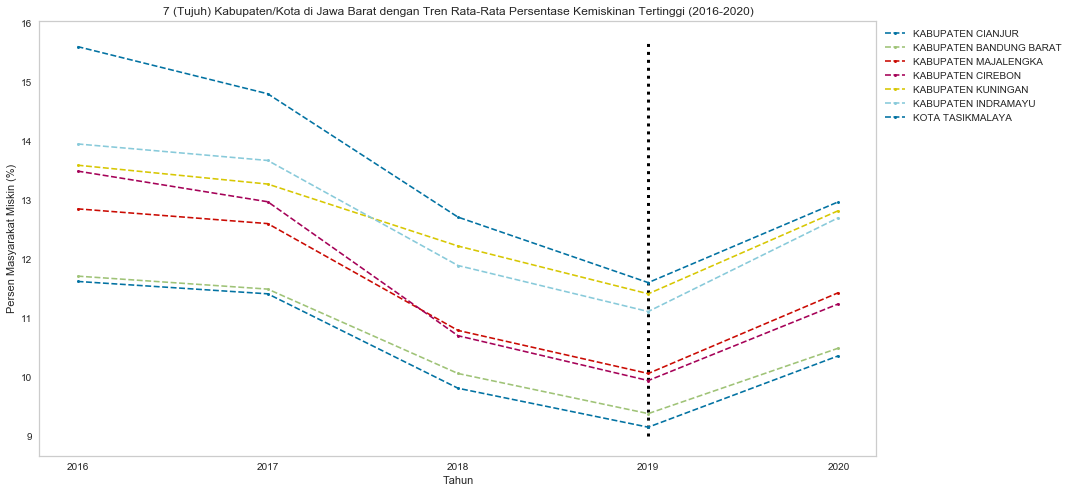

In [208]:
fig, ax = plt.subplots(1,1,figsize=(15,8))

pov_percent_jabar_pivot2.iloc[-7:, :-1].T.plot(kind='line', marker='o', linestyle='--', linewidth=1.6, markersize=3, ax=ax)

plt.vlines(x = 2019, color = 'black', linestyle = ':', linewidth=3, ymin=9, ymax=15.7)
plt.title('7 (Tujuh) Kabupaten/Kota di Jawa Barat dengan Tren Rata-Rata Persentase Kemiskinan Tertinggi (2016-2020)')
plt.xlabel('Tahun')
plt.ylabel('Persen Masyarakat Miskin (%)')
plt.grid()
plt.xticks(np.arange(2016,2021,1))
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

### Analisis Korelasi Dampak Pandemi terhadap Tren Angka Kemiskinan di Jawa Barat

In [209]:
pov_percent_jabar.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,persentase_penduduk,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,9.97,PERSEN,2010
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,10.65,PERSEN,2010
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,14.32,PERSEN,2010
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,9.30,PERSEN,2010
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,13.94,PERSEN,2010


In [210]:
pov_percent_jabar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   292 non-null    int64  
 1   kode_provinsi        292 non-null    int64  
 2   nama_provinsi        292 non-null    object 
 3   kode_kabupaten_kota  292 non-null    int64  
 4   nama_kabupaten_kota  292 non-null    object 
 5   persentase_penduduk  292 non-null    float64
 6   satuan               292 non-null    object 
 7   tahun                292 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 18.4+ KB


In [211]:
pov_percent_jabar.describe().T

,count,mean,std,min,25%,50%,75%,max
id,292.0,146.500000,84.437354,1.00,73.7500,146.500,219.2500,292.00
kode_provinsi,292.0,32.000000,0.000000,32.00,32.0000,32.000,32.0000,32.00
kode_kabupaten_kota,292.0,3231.561644,31.472559,3201.00,3207.0000,3214.000,3273.0000,3279.00
persentase_penduduk,292.0,9.505514,3.511846,2.07,7.1175,9.345,11.9925,20.71
tahun,292.0,2015.051370,3.164575,2010.00,2012.0000,2015.000,2018.0000,2020.00


In [212]:
pov_percent_province.iloc[-1:, :].loc[:, pov_percent_province.columns == 'JAWA BARAT']['JAWA BARAT'][2021]

8.4

In [213]:
pov_percent_jabar_grouped = pov_percent_jabar.groupby('tahun')['persentase_penduduk'].mean()
pov_percent_jabar_grouped

tahun
2010    11.370769
2011    10.987308
2012    10.388077
2013     9.986923
2014     9.550000
2015    10.015185
2016     9.435556
2017     9.229630
2018     7.941852
2019     7.406667
2020     8.424815
Name: persentase_penduduk, dtype: float64

In [214]:
# Imputasi Data Kemiskinan Jawa Barat Tahun 2021
pov_percent_jabar_grouped[2021] = pov_percent_province.iloc[-1:, :].loc[:, pov_percent_province.columns == 'JAWA BARAT']['JAWA BARAT'][2021]

In [215]:
pov_percent_jabar_grouped

tahun
2010    11.370769
2011    10.987308
2012    10.388077
2013     9.986923
2014     9.550000
2015    10.015185
2016     9.435556
2017     9.229630
2018     7.941852
2019     7.406667
2020     8.424815
2021     8.400000
Name: persentase_penduduk, dtype: float64

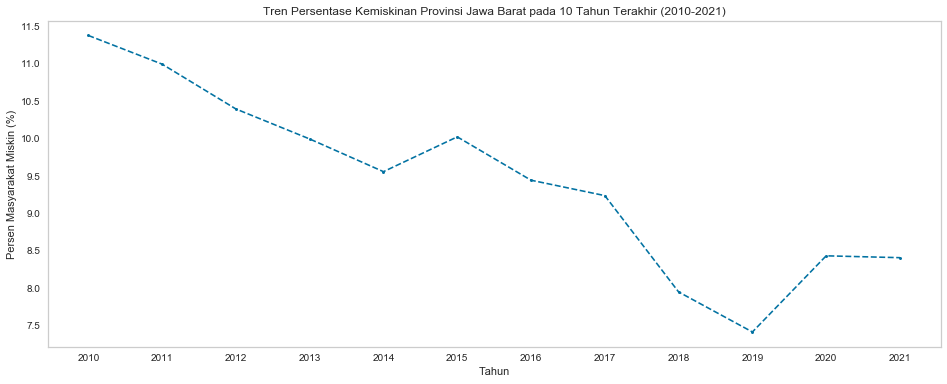

In [216]:
fig, ax = plt.subplots(1,1,figsize=(16,6))

pov_percent_jabar_grouped.plot(kind='line', marker='o', linestyle='--', linewidth=1.6, markersize=3, ax=ax)

plt.title('Tren Persentase Kemiskinan Provinsi Jawa Barat pada 10 Tahun Terakhir (2010-2021)')
plt.xlabel('Tahun')
plt.ylabel('Persen Masyarakat Miskin (%)')
plt.xticks(np.arange(2010,2022,1))
plt.grid()

Secara visual, dapat terlihat bahwa terjadi lonjakan persentase kemiskinan di Jawa Barat yang cukup tinggi di masa pandemi yang dimulai pada akhir tahun 2019.

In [217]:
print('Statistik Persentase Kemiskinan di Jawa Barat sebelum Pandemi')
print(pov_percent_jabar_grouped[:-3].describe())
print()
print('Statistik Persentase Kemiskinan di Jawa Barat saat Pandemi')
print(pov_percent_jabar_grouped[-3:].describe())

Statistik Persentase Kemiskinan di Jawa Barat sebelum Pandemi
count     9.000000
mean      9.878367
std       1.013791
min       7.941852
25%       9.435556
50%       9.986923
75%      10.388077
max      11.370769
Name: persentase_penduduk, dtype: float64

Statistik Persentase Kemiskinan di Jawa Barat saat Pandemi
count    3.000000
mean     8.077160
std      0.580797
min      7.406667
25%      7.903333
50%      8.400000
75%      8.412407
max      8.424815
Name: persentase_penduduk, dtype: float64


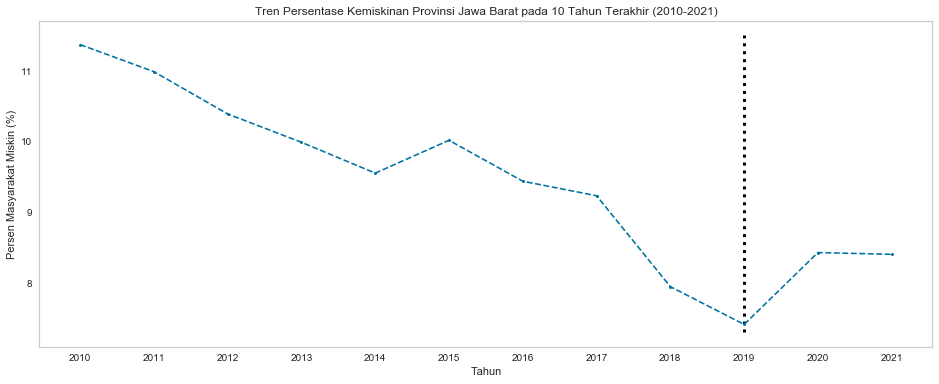

In [218]:
fig, (ax) = plt.subplots(1,1,figsize=(16,6))

pov_percent_jabar_grouped.plot(kind='line', marker='o', linestyle='--', linewidth=1.6, markersize=3, ax=ax)

plt.vlines(x = 2019, color = 'black', linestyle = ':', linewidth=3, ymin=7.3, ymax=11.5)

plt.title('Tren Persentase Kemiskinan Provinsi Jawa Barat pada 10 Tahun Terakhir (2010-2021)')
plt.xlabel('Tahun')
plt.ylabel('Persen Masyarakat Miskin (%)')
plt.xticks(np.arange(2010,2022,1))

plt.grid()

Mean kemiskinan sebelum pandemi memang relatif masih lebih besar dibandingkan dengan setelah pandemi. Hal ini disebabkan perbedaan jumlah data yang cukup timpang (10 tahun sebelum pandemi berbanding dengan 3 tahun setelah pandemi) dengan angka kemiskinan sebelum pandemi memiliki nilai yang tinggi. Namun, hal yang menarik adalah terlihat bahwa terjadi pembalikan tren angka kemiskinan di Jawa Barat di titik awal pandemi melanda (tahun 2019), di mana tren angka kemiskinan mengalami peningkatan.

In [219]:
pov_percent_jabar_grouped_cov = pov_percent_jabar_grouped.copy().reset_index()
pov_percent_jabar_grouped_cov['Tahun Ke-'] = np.arange(1,13,1)
pov_percent_jabar_grouped_cov['Tahun Ke-'].iloc[-3:] = np.arange(1,4,1)
pov_percent_jabar_grouped_cov

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,tahun,persentase_penduduk,Tahun Ke-
0,2010,11.370769,1
1,2011,10.987308,2
2,2012,10.388077,3
3,2013,9.986923,4
4,2014,9.550000,5
5,2015,10.015185,6
6,2016,9.435556,7
7,2017,9.229630,8
8,2018,7.941852,9
9,2019,7.406667,1


In [220]:
# Analisis Kovarians
print('Kovarians Sebelum Pandemi')
print(pov_percent_jabar_grouped_cov[['Tahun Ke-', 'persentase_penduduk']][:-3].cov()['Tahun Ke-'][1])
print('Kovarians Setelah Pandemi')
print(pov_percent_jabar_grouped_cov[['Tahun Ke-', 'persentase_penduduk']][-3:].cov()['Tahun Ke-'][1])
print()

# Analisis Korelasi
print('Korelasi Sebelum Pandemi (Pearson)')
print(pov_percent_jabar_grouped_cov[['Tahun Ke-', 'persentase_penduduk']][:-3].corr(method='pearson')['Tahun Ke-'][1])
print('Korelasi Setelah Pandemi (Pearson)')
print(pov_percent_jabar_grouped_cov[['Tahun Ke-', 'persentase_penduduk']][-3:].corr(method='pearson')['Tahun Ke-'][1])
print()

print('Korelasi Sebelum Pandemi (Spearman)')
print(pov_percent_jabar_grouped_cov[['Tahun Ke-', 'persentase_penduduk']][:-3].corr(method='spearman')['Tahun Ke-'][1])
print('Korelasi Setelah Pandemi (Spearman)')
print(pov_percent_jabar_grouped_cov[['Tahun Ke-', 'persentase_penduduk']][-3:].corr(method='spearman')['Tahun Ke-'][1])

Kovarians Sebelum Pandemi
-2.608185541310541
Kovarians Setelah Pandemi
0.4966666666666675

Korelasi Sebelum Pandemi (Pearson)
-0.9394190511153151
Korelasi Setelah Pandemi (Pearson)
0.855146410118115

Korelasi Sebelum Pandemi (Spearman)
-0.95
Korelasi Setelah Pandemi (Spearman)
0.5


Hasil yang teramati dari visualisasi dibuktikan dengan hasil analisis kovarians maupun korelasi. Nilai kovarians menunjukkan perubahan yang cukup signifikan dari nilai negatif yang menunjukkan tren penurunan angka kemiskinan selama sebelum pandemi, menjadi bernilai positif yang menunjukkan angka kemiskinan mengalami perubahan arah (naik) setelah pandemi. Hal yang sama ditunjukkan oleh hasil analisis korelasi baik koefisien korelasi Pearson maupun Spearman. Dengan demikian, terbukti bahwa terdapat hubungan korelatif positif antara kondisi pandemi dengan peningkatan kemiskinan di Jawa Barat.

### Tren Angka Pengangguran di Indonesia

Sumber Data: https://www.bps.go.id/indicator/6/543/1/tingkat-pengangguran-terbuka-menurut-provinsi.html

In [221]:
unemp_data_ind = pd.read_excel('Pengangguran Indonesia-Jabar/Data Persentase Pengangguran Nasional 2016-2021.xlsx').iloc[:, :-2]
unemp_data_ind.head()

,Provinsi,2016,2017,2018,2019,2020,2021,Rata-Rata
0,ACEH,7.57,6.57,6.34,6.17,6.59,6.30,6.590000
1,SUMATERA UTARA,5.84,5.60,5.55,5.39,6.91,6.01,5.883333
2,SUMATERA BARAT,5.09,5.58,5.66,5.38,6.88,6.67,5.876667
3,RIAU,7.43,6.22,5.98,5.76,6.32,4.96,6.111667
4,JAMBI,4.00,3.87,3.73,4.06,5.13,4.76,4.258333


In [222]:
unemp_data_ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Provinsi   35 non-null     object 
 1   2016       35 non-null     float64
 2   2017       35 non-null     float64
 3   2018       35 non-null     float64
 4   2019       35 non-null     float64
 5   2020       35 non-null     float64
 6   2021       35 non-null     float64
 7   Rata-Rata  35 non-null     float64
dtypes: float64(7), object(1)
memory usage: 2.3+ KB


In [223]:
unemp_data_ind.describe().T

,count,mean,std,min,25%,50%,75%,max
2016,35.0,5.007429,1.906429,1.890000,3.340000,4.630000,6.150000,8.920000
2017,35.0,5.113429,1.812148,1.480000,3.795000,4.570000,6.355000,9.290000
2018,35.0,4.817429,1.687376,1.400000,3.595000,4.350000,6.160000,8.470000
2019,35.0,4.727143,1.537555,1.570000,3.550000,4.440000,5.850000,8.110000
2020,35.0,6.063143,1.991027,3.320000,4.580000,5.630000,6.875000,10.950000
2021,35.0,5.526000,1.706524,3.280000,4.265000,5.170000,6.280000,10.120000
Rata-Rata,35.0,5.209095,1.685660,2.898333,3.708333,4.776667,6.350833,9.071667


In [224]:
unemp_data_ind.describe(include='object').T

,count,unique,top,freq
Provinsi,35,35,INDONESIA,1


In [225]:
unemp_percent_province = unemp_data_ind.iloc[:-1, :-1].set_index('Provinsi').T
unemp_percent_province

Provinsi,ACEH,SUMATERA UTARA,SUMATERA BARAT,RIAU,JAMBI,SUMATERA SELATAN,BENGKULU,LAMPUNG,KEP. BANGKA BELITUNG,KEP. RIAU,...,SULAWESI UTARA,SULAWESI TENGAH,SULAWESI SELATAN,SULAWESI TENGGARA,GORONTALO,SULAWESI BARAT,MALUKU,MALUKU UTARA,PAPUA BARAT,PAPUA
2016,7.57,5.84,5.09,7.43,4.00,4.31,3.30,4.62,2.60,7.69,...,6.18,3.29,4.80,2.72,2.76,3.33,7.05,4.01,7.46,3.35
2017,6.57,5.60,5.58,6.22,3.87,4.39,3.74,4.33,3.78,7.16,...,7.18,3.81,5.61,3.30,4.28,3.21,9.29,5.33,6.49,3.62
2018,6.34,5.55,5.66,5.98,3.73,4.27,3.35,4.04,3.61,8.04,...,6.61,3.37,4.94,3.19,3.70,3.01,6.95,4.63,6.45,3.00
2019,6.17,5.39,5.38,5.76,4.06,4.53,3.26,4.03,3.58,7.50,...,6.01,3.11,4.62,3.52,3.76,2.98,6.69,4.81,6.43,3.51
2020,6.59,6.91,6.88,6.32,5.13,5.51,4.07,4.67,5.25,10.34,...,7.37,3.77,6.31,4.58,4.28,3.32,7.57,5.15,6.80,4.28
2021,6.30,6.01,6.67,4.96,4.76,5.17,3.72,4.54,5.04,10.12,...,7.28,3.73,5.79,4.22,3.41,3.28,6.73,5.06,6.18,3.77


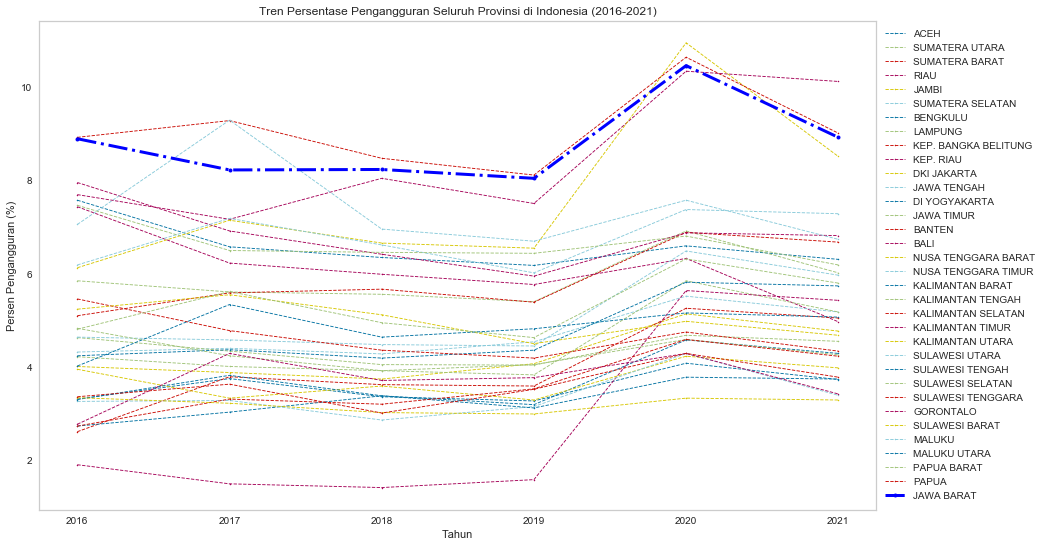

In [226]:
fig, ax = plt.subplots(1,1,figsize=(15,9))

unemp_percent_province.loc[:, unemp_percent_province.columns != 'JAWA BARAT'].plot(kind='line', 
                                                                                         marker='.',
                                                                                         linestyle='--',
                                                                                         linewidth=0.9,
                                                                                         markersize=3,
                                                                                         ax=ax)

unemp_percent_province.loc[:, unemp_percent_province.columns == 'JAWA BARAT'].plot(kind='line', 
                                                                                         marker='o',
                                                                                         linestyle='-.',
                                                                                         linewidth=3, 
                                                                                         markersize=4,
                                                                                         color='blue',
                                                                                         ax=ax)
plt.title('Tren Persentase Pengangguran Seluruh Provinsi di Indonesia (2016-2021)')
plt.xlabel('Tahun')
plt.ylabel('Persen Pengangguran (%)')
plt.grid()
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

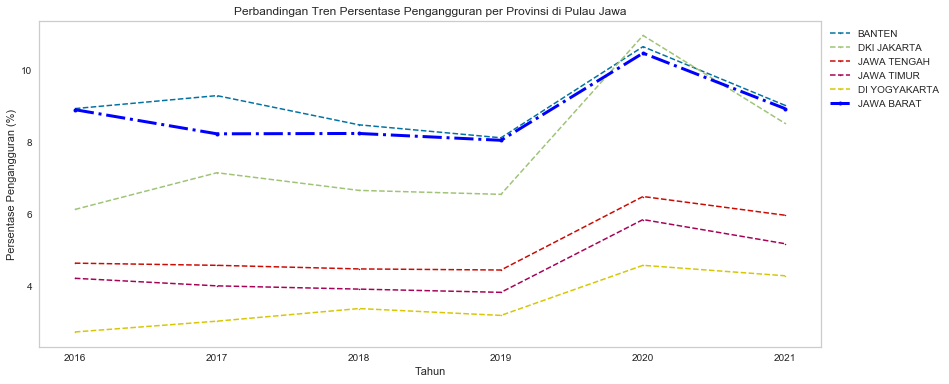

In [227]:
fig, ax = plt.subplots(1,1,figsize=(14,6))

unemp_java = unemp_data_ind.iloc[:,:-1].set_index('Provinsi').T[['BANTEN', 'DKI JAKARTA', 
                                                                 'JAWA TENGAH','JAWA TIMUR',
                                                                 'DI YOGYAKARTA']]

unemp_java.plot(kind='line', marker='.', linestyle='--', linewidth=1.5, markersize=3, ax=ax)

unemp_percent_province.loc[:, unemp_percent_province.columns == 'JAWA BARAT'].plot(kind='line', 
                                                                                         marker='o',
                                                                                         linestyle='-.',
                                                                                         linewidth=3, 
                                                                                         markersize=4,
                                                                                         color='blue',
                                                                                         ax=ax)

plt.title('Perbandingan Tren Persentase Pengangguran per Provinsi di Pulau Jawa')
plt.xlabel('Tahun')
plt.ylabel('Persentase Pengangguran (%)')
plt.grid()
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

In [228]:
worst_unemp_prov = unemp_data_ind.sort_values('Rata-Rata', ascending=False).iloc[:5]
worst_unemp_prov

,Provinsi,2016,2017,2018,2019,2020,2021,Rata-Rata
15,BANTEN,8.92,9.28,8.47,8.11,10.64,9.01,9.071667
11,JAWA BARAT,8.89,8.22,8.23,8.04,10.46,8.92,8.793333
9,KEP. RIAU,7.69,7.16,8.04,7.50,10.34,10.12,8.475000
10,DKI JAKARTA,6.12,7.14,6.65,6.54,10.95,8.51,7.651667
30,MALUKU,7.05,9.29,6.95,6.69,7.57,6.73,7.380000


Diperoleh informasi menarik bahwa Provinsi Jawa Barat memiliki rata-rata persentase pengangguran tertinggi kedua nasional dari data yang diperoleh pada periode 2016-2021

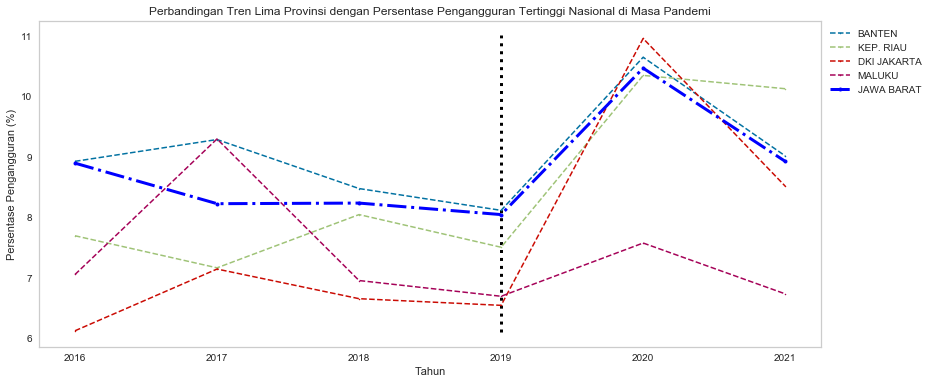

In [229]:
fig, ax = plt.subplots(1,1,figsize=(14,6))

unemp_sample = worst_unemp_prov.iloc[:, :-1].loc[worst_unemp_prov['Provinsi'] != 'JAWA BARAT'].set_index('Provinsi').T

unemp_sample.plot(kind='line', marker='.', linestyle='--', linewidth=1.5, markersize=3, ax=ax)

unemp_percent_province.loc[:, unemp_percent_province.columns == 'JAWA BARAT'].plot(kind='line', 
                                                                                         marker='o',
                                                                                         linestyle='-.',
                                                                                         linewidth=3, 
                                                                                         markersize=4,
                                                                                         color='blue',
                                                                                         ax=ax)

plt.vlines(x = 2019, color = 'black', linestyle = ':', linewidth=3, ymin=6.1, ymax=11)
plt.title('Perbandingan Tren Lima Provinsi dengan Persentase Pengangguran Tertinggi Nasional di Masa Pandemi')
plt.xlabel('Tahun')
plt.ylabel('Persentase Pengangguran (%)')
plt.grid()
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

Terlihat bahwa Jawa Barat memiliki persentase angka pengangguran yang sangat tinggi -- tertinggi kedua nasional sebelum pandemi di bawah Provinsi Banten. Terdapat tren peningkatan persentase pengangguran yang cukup signifikan pada tahun 2019 meskipun terdapat tanda tren penurunan pada tahun 2021 meskipun angkanya masih sangat tinggi (8.92%) dan menjadi provinsi dengan persentase pengangguran tertinggi ketiga nasional di bawah Provinsi Kepulauan Riau dan Provinsi Banten.

### Tren Angka Pengangguran di Jawa Barat

Sumber Data: 
- https://drive.google.com/drive/folders/1b0GPENfCOmZN5tdpCWOe7P7QOf2tiLNs
- https://jabar.bps.go.id/subject/6/tenaga-kerja.html#subjekViewTab3

In [230]:
unemp_data_jabar = pd.read_excel('Pengangguran Indonesia-Jabar/Data Persentase Pengangguran Jabar 2016-2020.xlsx')
unemp_data_jabar.head()

,Daerah,2016,2017,2018,2019,2020,Rata-Rata
0,Provinsi Jawa Barat,8.89,8.22,8.23,8.04,10.46,8.768
1,Bogor,10.01,9.55,9.83,9.11,14.29,10.558
2,Sukabumi,10.05,7.66,7.84,8.05,9.60,8.640
3,Cianjur,10.06,10.10,10.23,9.81,11.05,10.250
4,Bandung,4.03,3.92,5.07,5.51,8.58,5.422


In [231]:
unemp_data_jabar.tail()

,Daerah,2016,2017,2018,2019,2020,Rata-Rata
23,Kota Bekasi,9.36,9.32,9.14,8.30,10.68,9.360
24,Kota Depok,7.48,7.00,6.66,6.12,9.87,7.426
25,Kota Cimahi,9.00,8.43,8.00,8.09,13.30,9.364
26,Kota Tasikmalaya,5.46,6.89,6.89,6.78,7.99,6.802
27,Kota Banjar,7.38,5.97,5.95,6.16,6.73,6.438


In [232]:
unemp_data_jabar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Daerah     28 non-null     object 
 1   2016       28 non-null     float64
 2   2017       28 non-null     float64
 3   2018       28 non-null     float64
 4   2019       28 non-null     float64
 5   2020       28 non-null     float64
 6   Rata-Rata  28 non-null     float64
dtypes: float64(6), object(1)
memory usage: 1.7+ KB


In [233]:
unemp_data_jabar.describe().T

,count,mean,std,min,25%,50%,75%,max
2016,28.0,8.574286,2.092835,4.010,7.4550,9.010,10.0325,11.510
2017,28.0,7.907143,1.876174,3.340,6.9725,8.325,9.3225,10.970
2018,28.0,7.940714,1.816080,3.590,6.9125,8.345,9.1250,10.640
2019,28.0,7.855714,1.653950,4.370,6.6625,8.210,9.0575,10.350
2020,28.0,9.996786,2.337965,5.080,8.8575,10.570,11.5200,14.290
Rata-Rata,28.0,8.454929,1.834743,4.268,7.3430,9.031,9.9400,10.558


In [234]:
unemp_data_jabar.describe(include='object').T

,count,unique,top,freq
Daerah,28,28,Kota Cimahi,1


In [235]:
unemp_data_jabar.set_index('Daerah', inplace=True)
unemp_data_jabar

,2016,2017,2018,2019,2020,Rata-Rata
Daerah,,,,,,
Provinsi Jawa Barat,8.89,8.22,8.23,8.04,10.46,8.768
Bogor,10.01,9.55,9.83,9.11,14.29,10.558
Sukabumi,10.05,7.66,7.84,8.05,9.60,8.640
Cianjur,10.06,10.10,10.23,9.81,11.05,10.250
Bandung,4.03,3.92,5.07,5.51,8.58,5.422
Garut,6.50,7.86,7.12,7.35,8.95,7.556
Tasikmalaya,8.51,6.61,6.92,6.31,7.12,7.094
Ciamis,6.99,5.17,4.64,5.16,5.66,5.524
Kuningan,7.49,7.94,9.10,9.68,11.22,9.086


In [236]:
# Preparing the data for visualization
unemp_data_jabar_viz = unemp_data_jabar.drop('Provinsi Jawa Barat', axis=0).sort_values(2020, ascending=True)

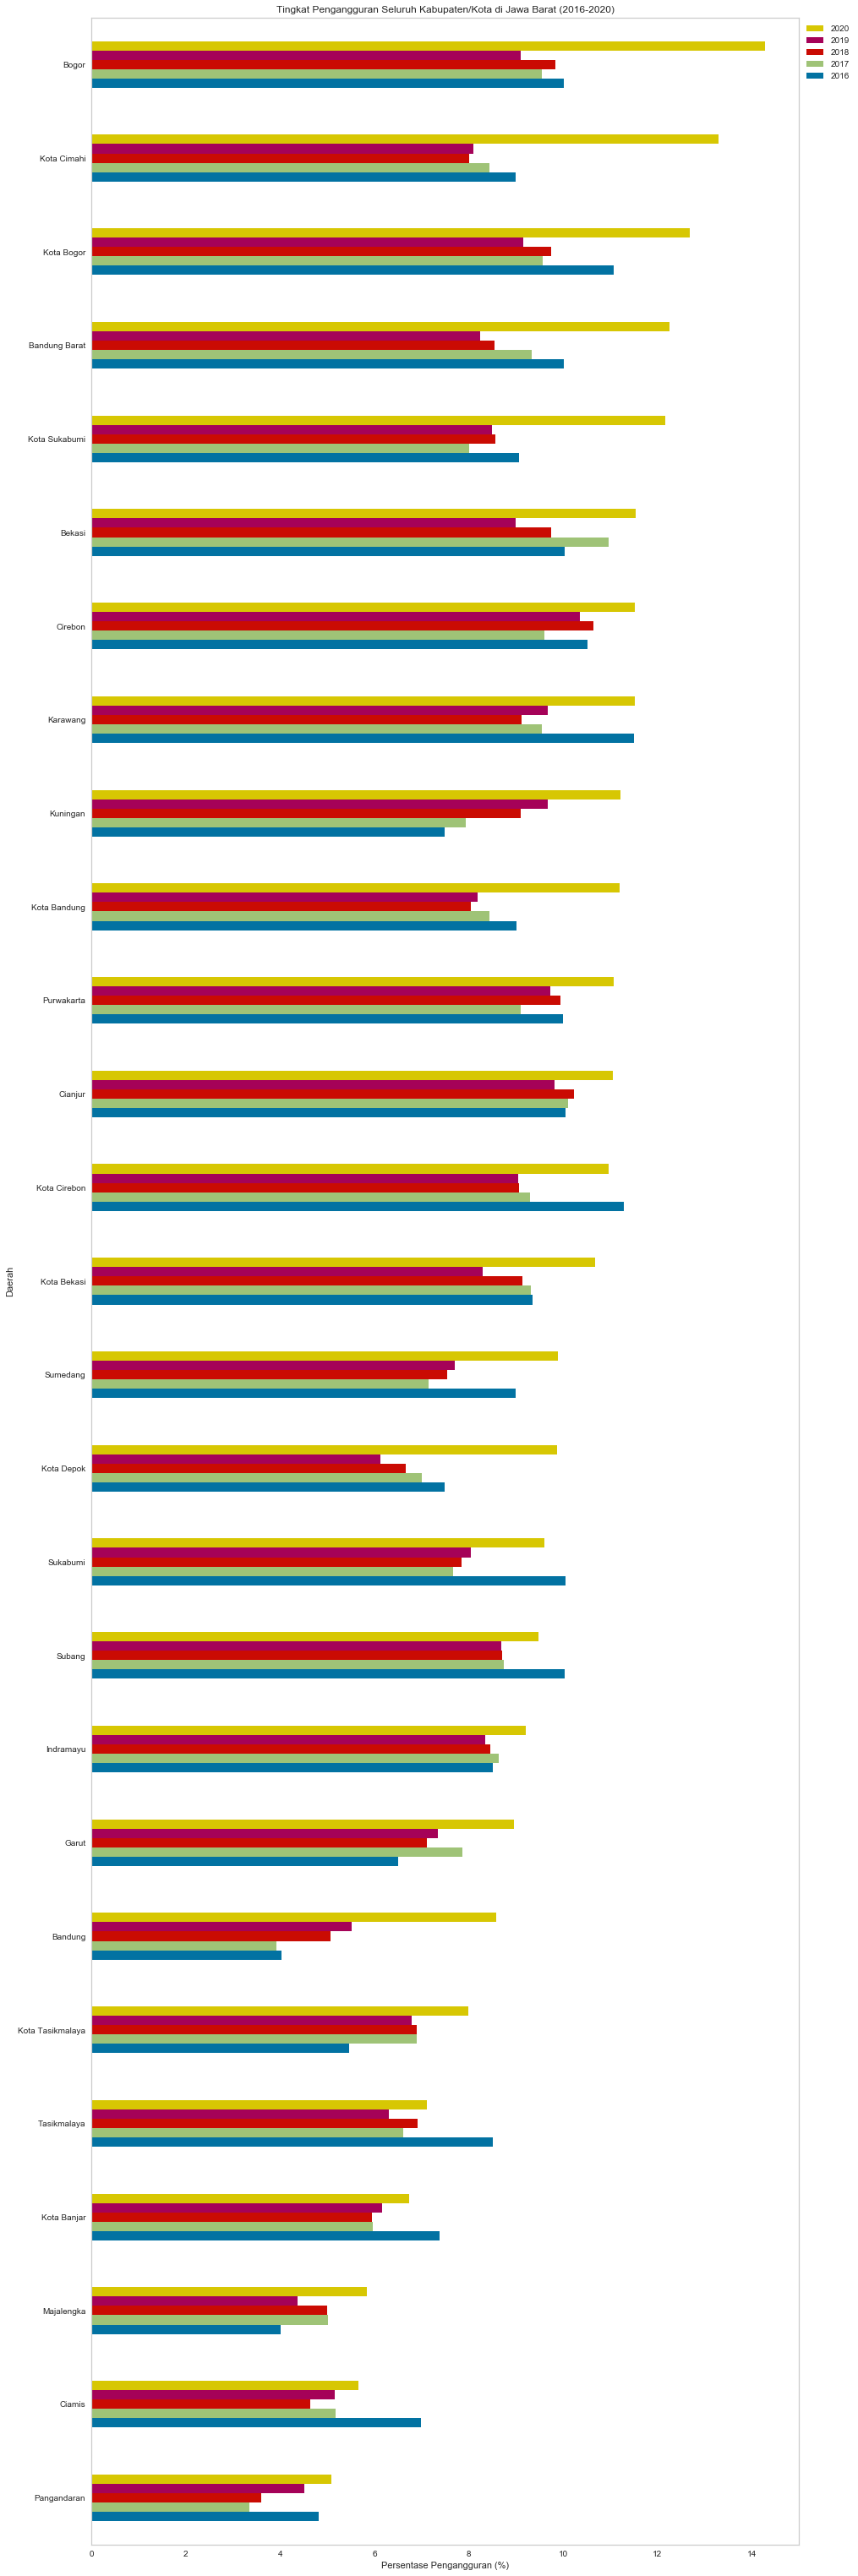

In [237]:
# Visualizing the data
fig, ax = plt.subplots(1, 1, figsize=(15, 50))

unemp_data_jabar_viz.iloc[:, :-1].plot(kind='barh', figsize=(15,55), ax=ax)

handles,labels = ax.get_legend_handles_labels()
handles = [handles[4], handles[3], handles[2], handles[1], handles[0]]
labels = [labels[4], labels[3], labels[2], labels[1], labels[0]]

plt.title('Tingkat Pengangguran Seluruh Kabupaten/Kota di Jawa Barat (2016-2020)')
plt.xlabel('Persentase Pengangguran (%)')
plt.ylabel('Daerah')
plt.grid()
plt.legend(handles=handles, labels=labels, loc="upper left", bbox_to_anchor=(1,1))

In [238]:
unemp_jabar_sample = unemp_data_jabar.drop('Provinsi Jawa Barat', axis=0).sort_values('Rata-Rata', ascending=True).iloc[-7:, :]
unemp_jabar_sample

,2016,2017,2018,2019,2020,Rata-Rata
Daerah,,,,,,
Purwakarta,10.00,9.11,9.94,9.73,11.07,9.970
Cianjur,10.06,10.10,10.23,9.81,11.05,10.250
Bekasi,10.03,10.97,9.74,9.00,11.54,10.256
Karawang,11.51,9.55,9.12,9.68,11.52,10.276
Kota Bogor,11.08,9.57,9.74,9.16,12.68,10.446
Cirebon,10.51,9.61,10.64,10.35,11.52,10.526
Bogor,10.01,9.55,9.83,9.11,14.29,10.558


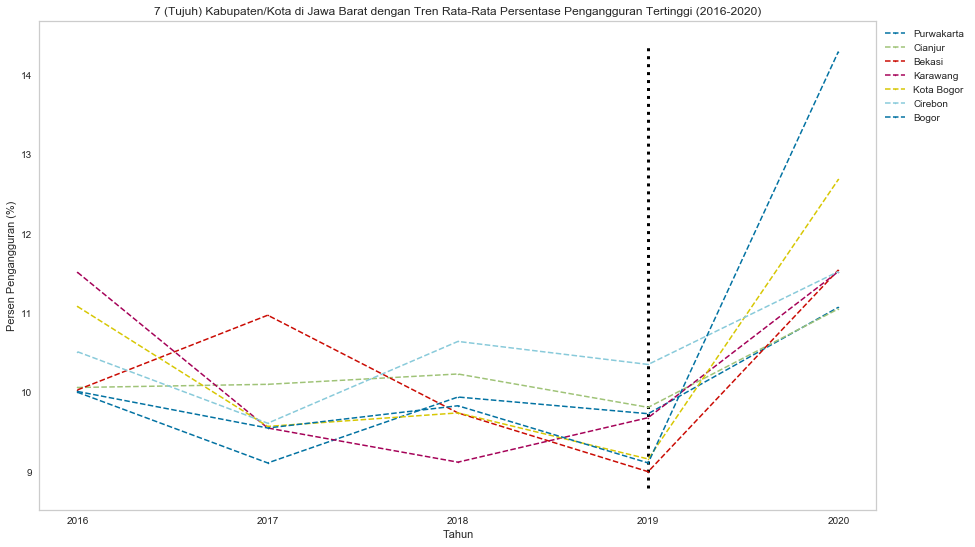

In [239]:
fig, ax = plt.subplots(1,1,figsize=(15,9))

unemp_jabar_sample.iloc[:, :-1].T.plot(kind='line', marker='.', linestyle='--', linewidth=1.5, markersize=3, ax=ax)

plt.vlines(x = 2019, color = 'black', linestyle = ':', linewidth=3, ymin=8.8, ymax=14.4)
plt.title('7 (Tujuh) Kabupaten/Kota di Jawa Barat dengan Tren Rata-Rata Persentase Pengangguran Tertinggi (2016-2020)')
plt.xlabel('Tahun')
plt.ylabel('Persen Pengangguran (%)')
plt.grid()
plt.xticks(np.arange(2016, 2021, 1))
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

### Analisis Korelasi Dampak Pandemi terhadap Tren Angka Pengangguran di Jawa Barat

In [240]:
unemp_data_jabar.head()

,2016,2017,2018,2019,2020,Rata-Rata
Daerah,,,,,,
Provinsi Jawa Barat,8.89,8.22,8.23,8.04,10.46,8.768
Bogor,10.01,9.55,9.83,9.11,14.29,10.558
Sukabumi,10.05,7.66,7.84,8.05,9.60,8.640
Cianjur,10.06,10.10,10.23,9.81,11.05,10.250
Bandung,4.03,3.92,5.07,5.51,8.58,5.422


In [241]:
unemp_data_jabar_grouped = unemp_data_jabar.iloc[:, :-1].loc['Provinsi Jawa Barat']
unemp_data_jabar_grouped

2016     8.89
2017     8.22
2018     8.23
2019     8.04
2020    10.46
Name: Provinsi Jawa Barat, dtype: float64

In [242]:
# Imputasi Data Pengangguran Jawa Barat Tahun 2021
unemp_data_jabar_grouped[2021] = unemp_data_ind.loc[unemp_data_ind['Provinsi'] == 'JAWA BARAT'][2021][11]

In [243]:
unemp_data_jabar_grouped

2016     8.89
2017     8.22
2018     8.23
2019     8.04
2020    10.46
2021     8.92
Name: Provinsi Jawa Barat, dtype: float64

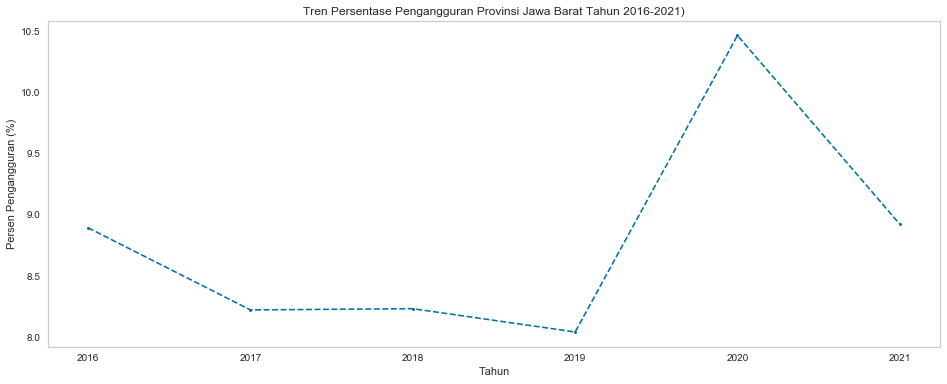

In [244]:
fig, ax = plt.subplots(1,1,figsize=(16,6))

unemp_data_jabar_grouped.plot(kind='line', marker='o', linestyle='--', linewidth=1.6, markersize=3, ax=ax)

plt.title('Tren Persentase Pengangguran Provinsi Jawa Barat Tahun 2016-2021)')
plt.xlabel('Tahun')
plt.ylabel('Persen Pengangguran (%)')
plt.xticks(np.arange(2016,2022,1))
plt.grid()

Secara visual, dapat terlihat bahwa terjadi lonjakan persentase pengangguran di Jawa Barat yang cukup tinggi di masa pandemi yang dimulai pada akhir tahun 2019.

In [245]:
print('Statistik Persentase Pengangguran di Jawa Barat sebelum Pandemi')
print(unemp_data_jabar_grouped[:-3].describe())
print()
print('Statistik Persentase Pengangguran di Jawa Barat saat Pandemi')
print(unemp_data_jabar_grouped[-3:].describe())

Statistik Persentase Pengangguran di Jawa Barat sebelum Pandemi
count    3.000000
mean     8.446667
std      0.383970
min      8.220000
25%      8.225000
50%      8.230000
75%      8.560000
max      8.890000
Name: Provinsi Jawa Barat, dtype: float64

Statistik Persentase Pengangguran di Jawa Barat saat Pandemi
count     3.000000
mean      9.140000
std       1.224908
min       8.040000
25%       8.480000
50%       8.920000
75%       9.690000
max      10.460000
Name: Provinsi Jawa Barat, dtype: float64


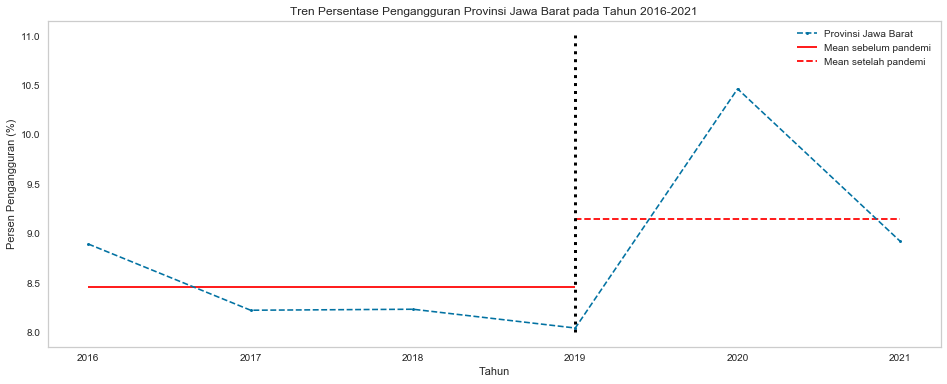

In [246]:
fig, (ax) = plt.subplots(1,1,figsize=(16,6))

unemp_data_jabar_grouped.plot(kind='line', marker='o', linestyle='--', linewidth=1.6, markersize=3, ax=ax)
plt.hlines(y=8.45, xmin = 2016, xmax=2019, color='red', label='Mean sebelum pandemi')
plt.hlines(y=9.14, xmin = 2019, xmax=2021, color='red', label='Mean setelah pandemi', linestyle = 'dashed')

plt.vlines(x = 2019, color = 'black', linestyle = ':', linewidth=3, ymin=8, ymax=11)

plt.title('Tren Persentase Pengangguran Provinsi Jawa Barat pada Tahun 2016-2021')
plt.xlabel('Tahun')
plt.ylabel('Persen Pengangguran (%)')
plt.xticks(np.arange(2016,2022,1))

plt.grid()
plt.legend()

Terlihat bahwa terjadi peningkatan rata-rata persentase kemiskinan selama pandemi melanda dari 8.45% menjadi 9.14%. Selain itu, hal yang menarik adalah diperoleh hasil yang serupa dengan analisis kemiskinan sebelumnya, yaitu terjadi pembalikan tren angka kemiskinan di Jawa Barat di titik awal pandemi melanda (tahun 2019), di mana tren angka kemiskinan mengalami tren peningkatan.

In [247]:
unemp_data_jabar_grouped_cov = unemp_data_jabar_grouped.copy().reset_index()
unemp_data_jabar_grouped_cov['Tahun Ke-'] = np.arange(1,7,1)
unemp_data_jabar_grouped_cov['Tahun Ke-'].iloc[-3:] = np.arange(1,4,1)
unemp_data_jabar_grouped_cov

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,index,Provinsi Jawa Barat,Tahun Ke-
0,2016,8.89,1
1,2017,8.22,2
2,2018,8.23,3
3,2019,8.04,1
4,2020,10.46,2
5,2021,8.92,3


In [248]:
# Analisis Kovarians
print('Kovarians Sebelum Pandemi')
print(unemp_data_jabar_grouped_cov[['Tahun Ke-', 'Provinsi Jawa Barat']][:-3].cov()['Tahun Ke-'][1])
print('Kovarians Setelah Pandemi')
print(unemp_data_jabar_grouped_cov[['Tahun Ke-', 'Provinsi Jawa Barat']][-3:].cov()['Tahun Ke-'][1])
print()

# Analisis Korelasi
print('Korelasi Sebelum Pandemi (Pearson)')
print(unemp_data_jabar_grouped_cov[['Tahun Ke-', 'Provinsi Jawa Barat']][:-3].corr(method='pearson')['Tahun Ke-'][1])
print('Korelasi Setelah Pandemi (Pearson)')
print(unemp_data_jabar_grouped_cov[['Tahun Ke-', 'Provinsi Jawa Barat']][-3:].corr(method='pearson')['Tahun Ke-'][1])
print()

print('Korelasi Sebelum Pandemi (Spearman)')
print(unemp_data_jabar_grouped_cov[['Tahun Ke-', 'Provinsi Jawa Barat']][:-3].corr(method='spearman')['Tahun Ke-'][1])
print('Korelasi Setelah Pandemi (Spearman)')
print(unemp_data_jabar_grouped_cov[['Tahun Ke-', 'Provinsi Jawa Barat']][-3:].corr(method='spearman')['Tahun Ke-'][1])

Kovarians Sebelum Pandemi
-0.33000000000000007
Kovarians Setelah Pandemi
0.4400000000000004

Korelasi Sebelum Pandemi (Pearson)
-0.8594410583926081
Korelasi Setelah Pandemi (Pearson)
0.3592106040535495

Korelasi Sebelum Pandemi (Spearman)
-0.5
Korelasi Setelah Pandemi (Spearman)
0.5


Hasil yang teramati dari visualisasi dibuktikan dengan hasil analisis kovarians maupun korelasi. Nilai kovarians menunjukkan perubahan yang cukup signifikan dari nilai negatif yang menunjukkan tren penurunan angka pengangguran selama sebelum pandemi, menjadi bernilai positif yang menunjukkan angka pengangguran mengalami perubahan arah (naik) setelah pandemi. Hal yang sama ditunjukkan oleh hasil analisis korelasi baik koefisien korelasi Pearson maupun Spearman. Dengan demikian, terbukti bahwa terdapat hubungan korelatif positif antara kondisi pandemi dengan peningkatan pengangguran di Jawa Barat.

## Analisis Lanjutan

### A. Analisis Korelasi Tanpa Faktor Pandemi

### Analisis Korelasi Tingkat Pengangguran dengan Angka Kemiskinan di Jawa Barat

Sumber Data: 
- https://drive.google.com/drive/folders/1zs42MkAcpfS6qP_wc3Eyjo3qU7ZOv0iB
- https://drive.google.com/drive/folders/1b0GPENfCOmZN5tdpCWOe7P7QOf2tiLNs
- https://jabar.bps.go.id/subject/6/tenaga-kerja.html#subjekViewTab3
- https://www.bps.go.id/indicator/23/192/4/persentase-penduduk-miskin-menurut-provinsi.html

#### Data Pengangguran Rata-Rata Jawa Barat

In [249]:
unemp_national_full = pd.read_excel('Pengangguran Indonesia-Jabar/Data Persentase Pengangguran Nasional 1986-2021.xlsx')
unemp_national_full.head()

,Provinsi,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Rata-Rata
0,ACEH,2.40,1.67,2.09,3.21,2.28,2.44,1.96,4.01,5.51,...,10.12,9.02,9.93,7.57,6.57,6.34,6.17,6.59,6.30,6.822857
1,SUMATERA UTARA,2.38,1.88,2.30,2.43,2.44,2.85,2.84,3.20,5.05,...,6.45,6.23,6.71,5.84,5.60,5.55,5.39,6.91,6.01,6.550286
2,SUMATERA BARAT,2.27,1.90,2.32,2.73,2.53,3.01,2.95,2.45,5.24,...,7.02,6.50,6.89,5.09,5.58,5.66,5.38,6.88,6.67,6.295143
3,RIAU,4.01,3.94,3.69,3.88,3.05,3.00,3.54,3.60,5.30,...,5.48,6.56,7.83,7.43,6.22,5.98,5.76,6.32,4.96,6.623714
4,JAMBI,2.38,1.37,2.57,2.26,1.92,2.39,1.96,1.80,2.79,...,4.76,5.08,4.34,4.00,3.87,3.73,4.06,5.13,4.76,4.233714


In [250]:
unemp_jabar_full = unemp_national_full.loc[unemp_national_full['Provinsi'] == 'JAWA BARAT']
unemp_jabar_full

,Provinsi,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Rata-Rata
11,JAWA BARAT,4.05,3.74,4.24,4.09,3.23,3.91,3.62,3.82,5.87,...,9.16,8.45,8.72,8.89,8.22,8.23,8.04,10.46,8.92,8.63


In [251]:
unemp_jabar_full.T.info()  # Tidak ada null values

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, Provinsi to Rata-Rata
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   11      37 non-null     object
dtypes: object(1)
memory usage: 1.6+ KB


In [252]:
unemp_jabar_full = unemp_jabar_full.iloc[:, 21:-1].T.reset_index()
unemp_jabar_full

,index,11
0,2007,13.08
1,2008,12.08
2,2009,10.96
3,2010,10.33
4,2011,9.96
5,2012,9.08
6,2013,9.16
7,2014,8.45
8,2015,8.72
9,2016,8.89


In [253]:
unemp_jabar_full[11].describe()

count    15.000000
mean      9.638667
std       1.493614
min       8.040000
25%       8.585000
50%       9.080000
75%      10.395000
max      13.080000
Name: 11, dtype: float64

#### Data Kemiskinan Rata-Rata Jawa Barat

In [254]:
pov_national_full = pd.read_excel('Kemiskinan Indonesia/Data Persentase Kemiskinan Nasional 2007-2021.xlsx')
pov_national_full.head()

,Provinsi,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Rata-Rata
0,ACEH,26.65,23.53,21.80,20.98,19.57,18.58,17.72,16.98,17.11,16.43,15.92,15.68,15.01,15.43,15.33,18.448000
1,SUMATERA UTARA,13.90,12.55,11.51,11.31,11.33,10.41,10.39,9.85,10.79,10.27,9.28,8.94,8.63,9.14,9.01,10.487333
2,SUMATERA BARAT,11.90,10.67,9.54,9.50,9.04,8.00,7.56,6.89,6.71,7.14,6.75,6.55,6.29,6.56,6.63,7.982000
3,RIAU,11.20,10.63,9.48,8.65,8.47,8.05,8.42,7.99,8.82,7.67,7.41,7.21,6.90,7.04,7.12,8.337333
4,JAMBI,10.27,9.32,8.77,8.34,8.65,8.28,8.42,8.39,9.12,8.37,7.90,7.85,7.51,7.97,8.09,8.483333


In [255]:
pov_jabar_full = pov_national_full.loc[pov_national_full['Provinsi'] == 'JAWA BARAT']
pov_jabar_full

,Provinsi,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Rata-Rata
11,JAWA BARAT,13.55,13.01,11.96,11.27,10.65,9.89,9.61,9.18,9.57,8.77,7.83,7.25,6.82,8.43,8.4,9.746


In [256]:
pov_jabar_full.T.info()  # Tidak ada null values

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, Provinsi to Rata-Rata
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   11      17 non-null     object
dtypes: object(1)
memory usage: 828.0+ bytes


In [257]:
pov_jabar_full = pov_jabar_full.iloc[:, 1:-1].T.reset_index()
pov_jabar_full

,index,11
0,2007,13.55
1,2008,13.01
2,2009,11.96
3,2010,11.27
4,2011,10.65
5,2012,9.89
6,2013,9.61
7,2014,9.18
8,2015,9.57
9,2016,8.77


In [258]:
pov_jabar_full[11].describe()

count    15.000000
mean      9.746000
std       2.009175
min       6.820000
25%       8.415000
50%       9.570000
75%      10.960000
max      13.550000
Name: 11, dtype: float64

#### Analisis Kovarians dan Korelasi

In [259]:
corr_data_jabar = pd.concat([pov_jabar_full.copy().rename(columns={11:'Kemiskinan'}), unemp_jabar_full[11]], 
                            axis=1)

corr_data_jabar.rename(columns={'index': 'Tahun', 11: 'Pengangguran'}, inplace=True)
corr_data_jabar

,Tahun,Kemiskinan,Pengangguran
0,2007,13.55,13.08
1,2008,13.01,12.08
2,2009,11.96,10.96
3,2010,11.27,10.33
4,2011,10.65,9.96
5,2012,9.89,9.08
6,2013,9.61,9.16
7,2014,9.18,8.45
8,2015,9.57,8.72
9,2016,8.77,8.89


In [260]:
# Analisis Kovarians
corr_data_jabar[['Kemiskinan', 'Pengangguran']].cov()

,Kemiskinan,Pengangguran
Kemiskinan,4.036783,2.691216
Pengangguran,2.691216,2.230884


Terlihat bahwa angka kemiskinan memiliki nilai kovarians positif terhadap tingkat pengangguran sebesar 2.691. Artinya, hal ini menunjukkan bahwa terdapat kecenderungan adanya peningkatan angka kemiskinan seiring dengan bertambahnya tingkat pengangguran

In [261]:
# Analisis Korelasi
corr_data_jabar[['Kemiskinan', 'Pengangguran']].corr(method='pearson')

,Kemiskinan,Pengangguran
Kemiskinan,1.000000,0.896793
Pengangguran,0.896793,1.000000


In [262]:
# Analisis Korelasi
corr_data_jabar[['Kemiskinan', 'Pengangguran']].corr(method='spearman')

,Kemiskinan,Pengangguran
Kemiskinan,1.00,0.85
Pengangguran,0.85,1.00


Analisis Korelasi juga memberikan hasil yang serupa, di mana terdapat korelasi positif antara tingkat pengangguran dengan angka kemiskinan, yaitu sebesar 0.897 (Pearson's Correlation Coefficient) dan 0.85 (Spearman's Correlation Coefficient). Nilai korelasi yang mendekati 1 menunjukkan adanya hubungan korelatif yang kuat antara tingkat pengangguran dengan angka kemiskinan.

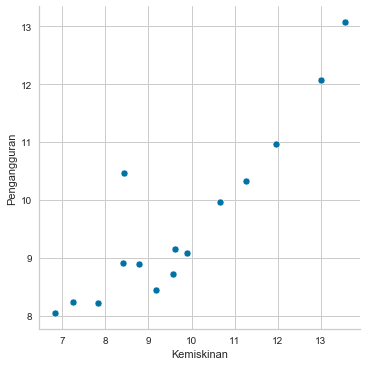

In [263]:
sns.relplot(data=corr_data_jabar, x='Kemiskinan', y="Pengangguran")

Hasil visualisasi melalui scatter plot juga memperlihatkan hasil yang serupa, dengan adanya hubungan positif yang cukup signifikan antara tingkat pengangguran dengan angka kemiskinan. Dengan demikian, dapat disimpulkan terdapat hubungan korelatif yang kuat antara tingkat pengangguran dengan angka kemiskinan di Jawa Barat.

### Analisis Korelasi Jumlah UMKM dengan Angka Kemiskinan di Jawa Barat

Sumber Data: https://drive.google.com/drive/folders/1cf_DM9EKCSeN4AC9wcToVE9f1tX3kQe6

#### Data Jumlah UMKM di Jawa Barat

In [264]:
umkm_data = pd.read_csv('UMKM Jabar/diskuk-od_17372_jml_ush_mikro_kecil_menengah_umkm__kabupatenkota_data.csv')
umkm_data

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_umkm,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,375048,UNIT,2016
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,269002,UNIT,2016
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,250808,UNIT,2016
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,353277,UNIT,2016
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,259141,UNIT,2016
...,...,...,...,...,...,...,...,...
157,158,32,JAWA BARAT,3275,KOTA BEKASI,274143,UNIT,2021
158,159,32,JAWA BARAT,3276,KOTA DEPOK,219238,UNIT,2021
159,160,32,JAWA BARAT,3277,KOTA CIMAHI,76833,UNIT,2021
160,161,32,JAWA BARAT,3278,KOTA TASIKMALAYA,123010,UNIT,2021


In [265]:
umkm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   162 non-null    int64 
 1   kode_provinsi        162 non-null    int64 
 2   nama_provinsi        162 non-null    object
 3   kode_kabupaten_kota  162 non-null    int64 
 4   nama_kabupaten_kota  162 non-null    object
 5   jumlah_umkm          162 non-null    int64 
 6   satuan               162 non-null    object
 7   tahun                162 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 10.2+ KB


In [266]:
umkm_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,162.0,81.500000,46.909487,1.0,41.25,81.5,121.75,162.0
kode_provinsi,162.0,32.000000,0.000000,32.0,32.00,32.0,32.00,32.0
kode_kabupaten_kota,162.0,3231.333333,31.298602,3201.0,3207.00,3214.0,3273.00,3279.0
jumlah_umkm,162.0,200506.617284,116480.186111,25896.0,102917.00,191241.5,276270.00,506347.0
tahun,162.0,2018.500000,1.713121,2016.0,2017.00,2018.5,2020.00,2021.0


In [267]:
umkm_data.describe(include='object').T

,count,unique,top,freq
nama_provinsi,162,1,JAWA BARAT,162
nama_kabupaten_kota,162,27,KOTA BANDUNG,6
satuan,162,1,UNIT,162


In [268]:
umkm_jabar_kumulatif = umkm_data.groupby('tahun')['jumlah_umkm'].sum().reset_index()
umkm_jabar_kumulatif

,tahun,jumlah_umkm
0,2016,4634807
1,2017,4921573
2,2018,5226081
3,2019,5549429
4,2020,5892792
5,2021,6257390


In [269]:
corr_data_jabar.tail()

,Tahun,Kemiskinan,Pengangguran
10,2017,7.83,8.22
11,2018,7.25,8.23
12,2019,6.82,8.04
13,2020,8.43,10.46
14,2021,8.40,8.92


In [270]:
corr_data_jabar_umkm = corr_data_jabar[corr_data_jabar['Tahun'] >= 2016]
corr_data_jabar_umkm = pd.concat([corr_data_jabar_umkm.reset_index(drop=True), umkm_jabar_kumulatif['jumlah_umkm']], axis=1)
corr_data_jabar_umkm

,Tahun,Kemiskinan,Pengangguran,jumlah_umkm
0,2016,8.77,8.89,4634807
1,2017,7.83,8.22,4921573
2,2018,7.25,8.23,5226081
3,2019,6.82,8.04,5549429
4,2020,8.43,10.46,5892792
5,2021,8.40,8.92,6257390


In [271]:
corr_data_jabar_umkm['jumlah_umkm']/1000000

0    4.634807
1    4.921573
2    5.226081
3    5.549429
4    5.892792
5    6.257390
Name: jumlah_umkm, dtype: float64

In [272]:
# Analisis Kovarians
corr_data_jabar_umkm_cov = corr_data_jabar_umkm.copy()

# Rescale data
corr_data_jabar_umkm_cov['jumlah_umkm'] = corr_data_jabar_umkm_cov['jumlah_umkm']/1000000
corr_data_jabar_umkm_cov[['jumlah_umkm', 'Kemiskinan']].cov()

,jumlah_umkm,Kemiskinan
jumlah_umkm,0.368766,0.001589
Kemiskinan,0.001589,0.575987


In [273]:
# Analisis Korelasi
corr_data_jabar_umkm_cov[['jumlah_umkm', 'Kemiskinan']].corr(method='pearson')

,jumlah_umkm,Kemiskinan
jumlah_umkm,1.000000,0.003447
Kemiskinan,0.003447,1.000000


In [274]:
# Analisis Korelasi
corr_data_jabar_umkm_cov[['jumlah_umkm', 'Kemiskinan']].corr(method='spearman')

,jumlah_umkm,Kemiskinan
jumlah_umkm,1.000000,-0.142857
Kemiskinan,-0.142857,1.000000


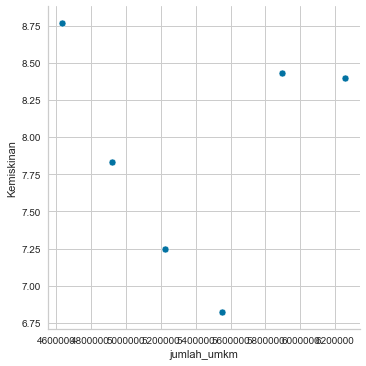

In [275]:
sns.relplot(data=corr_data_jabar_umkm, x='jumlah_umkm', y="Kemiskinan")

### Analisis Korelasi Jumlah UMKM dengan Tingkat Pengangguran di Jawa Barat

In [276]:
# Analisis Kovarians
corr_data_jabar_umkm_cov[['jumlah_umkm', 'Pengangguran']].cov()

,jumlah_umkm,Pengangguran
jumlah_umkm,0.368766,0.223131
Pengangguran,0.223131,0.803347


In [277]:
# Analisis Korelasi
corr_data_jabar_umkm_cov[['jumlah_umkm', 'Pengangguran']].corr(method='pearson')

,jumlah_umkm,Pengangguran
jumlah_umkm,1.000000,0.409953
Pengangguran,0.409953,1.000000


In [278]:
# Analisis Korelasi
corr_data_jabar_umkm_cov[['jumlah_umkm', 'Pengangguran']].corr(method='spearman')

,jumlah_umkm,Pengangguran
jumlah_umkm,1.000000,0.428571
Pengangguran,0.428571,1.000000


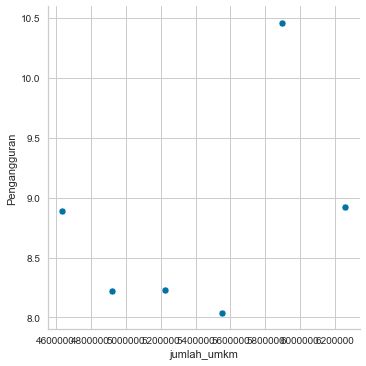

In [279]:
sns.relplot(data=corr_data_jabar_umkm, x='jumlah_umkm', y="Pengangguran")

### B. Analisis Korelasi dengan Faktor Pandemi

### Analisis Korelasi Tingkat Pengangguran dengan Angka Kemiskinan di Jawa Barat

In [280]:
corr_data_jabar

,Tahun,Kemiskinan,Pengangguran
0,2007,13.55,13.08
1,2008,13.01,12.08
2,2009,11.96,10.96
3,2010,11.27,10.33
4,2011,10.65,9.96
5,2012,9.89,9.08
6,2013,9.61,9.16
7,2014,9.18,8.45
8,2015,9.57,8.72
9,2016,8.77,8.89


#### Analisis Kovarians dan Korelasi Sebelum Pandemi

In [281]:
corr_data_jabar_before = corr_data_jabar[corr_data_jabar['Tahun'] < 2019]
corr_data_jabar_before

,Tahun,Kemiskinan,Pengangguran
0,2007,13.55,13.08
1,2008,13.01,12.08
2,2009,11.96,10.96
3,2010,11.27,10.33
4,2011,10.65,9.96
5,2012,9.89,9.08
6,2013,9.61,9.16
7,2014,9.18,8.45
8,2015,9.57,8.72
9,2016,8.77,8.89


In [282]:
# Analisis Kovarians
corr_data_jabar_before[['Kemiskinan', 'Pengangguran']].cov()

,Kemiskinan,Pengangguran
Kemiskinan,3.800706,2.946930
Pengangguran,2.946930,2.481733


In [283]:
# Analisis Korelasi
corr_data_jabar_before[['Kemiskinan', 'Pengangguran']].corr(method='pearson')

,Kemiskinan,Pengangguran
Kemiskinan,1.000000,0.959534
Pengangguran,0.959534,1.000000


In [284]:
# Analisis Korelasi
corr_data_jabar_before[['Kemiskinan', 'Pengangguran']].corr(method='spearman')

,Kemiskinan,Pengangguran
Kemiskinan,1.000000,0.965035
Pengangguran,0.965035,1.000000


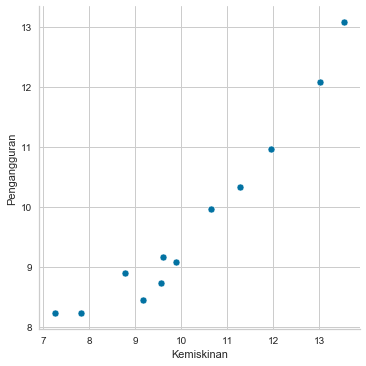

In [285]:
sns.relplot(data=corr_data_jabar_before, x='Kemiskinan', y="Pengangguran")

#### Analisis Kovarians dan Korelasi Setelah Pandemi

In [286]:
corr_data_jabar_after = corr_data_jabar[corr_data_jabar['Tahun'] >= 2019]
corr_data_jabar_after

,Tahun,Kemiskinan,Pengangguran
12,2019,6.82,8.04
13,2020,8.43,10.46
14,2021,8.40,8.92


In [287]:
# Analisis Kovarians
corr_data_jabar_after[['Kemiskinan', 'Pengangguran']].cov()

,Kemiskinan,Pengangguran
Kemiskinan,0.848233,0.8888
Pengangguran,0.888800,1.5004


In [288]:
# Analisis Korelasi
corr_data_jabar_after[['Kemiskinan', 'Pengangguran']].corr(method='pearson')

,Kemiskinan,Pengangguran
Kemiskinan,1.000000,0.787849
Pengangguran,0.787849,1.000000


In [289]:
# Analisis Korelasi
corr_data_jabar_after[['Kemiskinan', 'Pengangguran']].corr(method='spearman')

,Kemiskinan,Pengangguran
Kemiskinan,1.0,1.0
Pengangguran,1.0,1.0


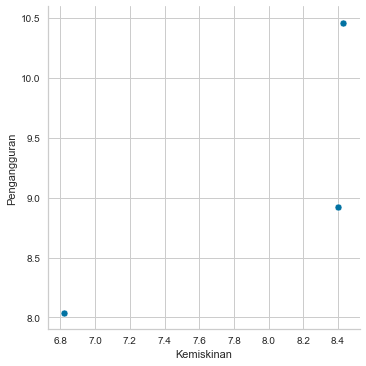

In [290]:
sns.relplot(data=corr_data_jabar_after, x='Kemiskinan', y="Pengangguran")

### Analisis Korelasi Jumlah UMKM dengan Angka Kemiskinan di Jawa Barat

#### Analisis Kovarians dan Korelasi Sebelum Pandemi

In [291]:
corr_data_jabar_umkm_before = corr_data_jabar_umkm_cov[corr_data_jabar_umkm_cov['Tahun'] < 2019]
corr_data_jabar_umkm_before

,Tahun,Kemiskinan,Pengangguran,jumlah_umkm
0,2016,8.77,8.89,4.634807
1,2017,7.83,8.22,4.921573
2,2018,7.25,8.23,5.226081


In [292]:
# Analisis Kovarians
corr_data_jabar_umkm_before[['jumlah_umkm', 'Kemiskinan']].cov()

,jumlah_umkm,Kemiskinan
jumlah_umkm,0.087427,-0.224152
Kemiskinan,-0.224152,0.588400


In [293]:
# Analisis Korelasi
corr_data_jabar_umkm_before[['jumlah_umkm', 'Kemiskinan']].corr(method='pearson')

,jumlah_umkm,Kemiskinan
jumlah_umkm,1.000000,-0.988285
Kemiskinan,-0.988285,1.000000


In [294]:
# Analisis Korelasi
corr_data_jabar_umkm_before[['jumlah_umkm', 'Kemiskinan']].corr(method='spearman')

,jumlah_umkm,Kemiskinan
jumlah_umkm,1.0,-1.0
Kemiskinan,-1.0,1.0


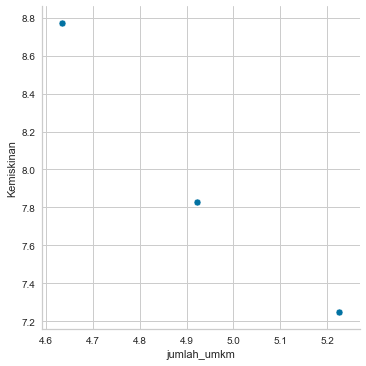

In [295]:
sns.relplot(data=corr_data_jabar_umkm_before, x='jumlah_umkm', y="Kemiskinan")

#### Analisis Kovarians dan Korelasi Setelah Pandemi

In [296]:
corr_data_jabar_umkm_after = corr_data_jabar_umkm_cov[corr_data_jabar_umkm_cov['Tahun'] >= 2019]
corr_data_jabar_umkm_after

,Tahun,Kemiskinan,Pengangguran,jumlah_umkm
3,2019,6.82,8.04,5.549429
4,2020,8.43,10.46,5.892792
5,2021,8.40,8.92,6.257390


In [297]:
# Analisis Kovarians
corr_data_jabar_umkm_after[['jumlah_umkm', 'Kemiskinan']].cov()

,jumlah_umkm,Kemiskinan
jumlah_umkm,0.125340,0.276742
Kemiskinan,0.276742,0.848233


In [298]:
# Analisis Korelasi
corr_data_jabar_umkm_after[['jumlah_umkm', 'Kemiskinan']].corr(method='pearson')

,jumlah_umkm,Kemiskinan
jumlah_umkm,1.000000,0.848738
Kemiskinan,0.848738,1.000000


In [299]:
# Analisis Korelasi
corr_data_jabar_umkm_after[['jumlah_umkm', 'Kemiskinan']].corr(method='spearman')

,jumlah_umkm,Kemiskinan
jumlah_umkm,1.0,0.5
Kemiskinan,0.5,1.0


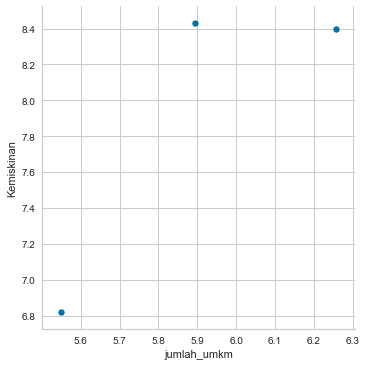

In [300]:
sns.relplot(data=corr_data_jabar_umkm_after, x='jumlah_umkm', y="Kemiskinan")

### Analisis Korelasi Jumlah UMKM dengan Tingkat Pengangguran di Jawa Barat

#### Analisis Kovarians dan Korelasi Sebelum Pandemi

In [301]:
# Analisis Kovarians
corr_data_jabar_umkm_before[['jumlah_umkm', 'Pengangguran']].cov()

,jumlah_umkm,Pengangguran
jumlah_umkm,0.087427,-0.096555
Pengangguran,-0.096555,0.147433


In [302]:
# Analisis Korelasi
corr_data_jabar_umkm_before[['jumlah_umkm', 'Pengangguran']].corr(method='pearson')

,jumlah_umkm,Pengangguran
jumlah_umkm,1.000000,-0.850457
Pengangguran,-0.850457,1.000000


In [303]:
# Analisis Korelasi
corr_data_jabar_umkm_before[['jumlah_umkm', 'Pengangguran']].corr(method='spearman')

,jumlah_umkm,Pengangguran
jumlah_umkm,1.0,-0.5
Pengangguran,-0.5,1.0


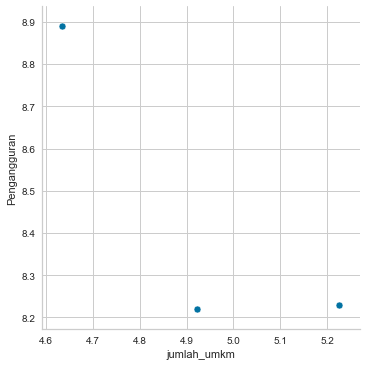

In [304]:
sns.relplot(data=corr_data_jabar_umkm_before, x='jumlah_umkm', y="Pengangguran")

#### Analisis Kovarians dan Korelasi Setelah Pandemi

In [305]:
# Analisis Kovarians
corr_data_jabar_umkm_after[['jumlah_umkm', 'Pengangguran']].cov()

,jumlah_umkm,Pengangguran
jumlah_umkm,0.125340,0.148744
Pengangguran,0.148744,1.500400


In [306]:
# Analisis Korelasi
corr_data_jabar_umkm_after[['jumlah_umkm', 'Pengangguran']].corr(method='pearson')

,jumlah_umkm,Pengangguran
jumlah_umkm,1.000000,0.342998
Pengangguran,0.342998,1.000000


In [307]:
# Analisis Korelasi
corr_data_jabar_umkm_after[['jumlah_umkm', 'Pengangguran']].corr(method='spearman')

,jumlah_umkm,Pengangguran
jumlah_umkm,1.0,0.5
Pengangguran,0.5,1.0


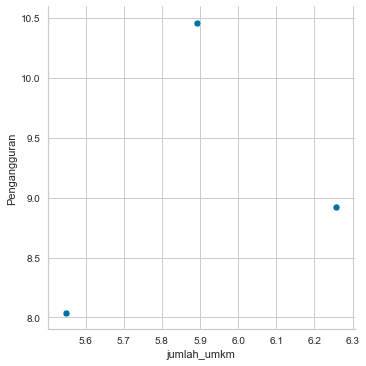

In [308]:
sns.relplot(data=corr_data_jabar_umkm_after, x='jumlah_umkm', y="Pengangguran")

### C. Analisis Perkembangan UMKM di Jawa Barat 

### Tren Jumlah UMKM di Jawa Barat

In [309]:
corr_data_jabar_umkm

,Tahun,Kemiskinan,Pengangguran,jumlah_umkm
0,2016,8.77,8.89,4634807
1,2017,7.83,8.22,4921573
2,2018,7.25,8.23,5226081
3,2019,6.82,8.04,5549429
4,2020,8.43,10.46,5892792
5,2021,8.40,8.92,6257390


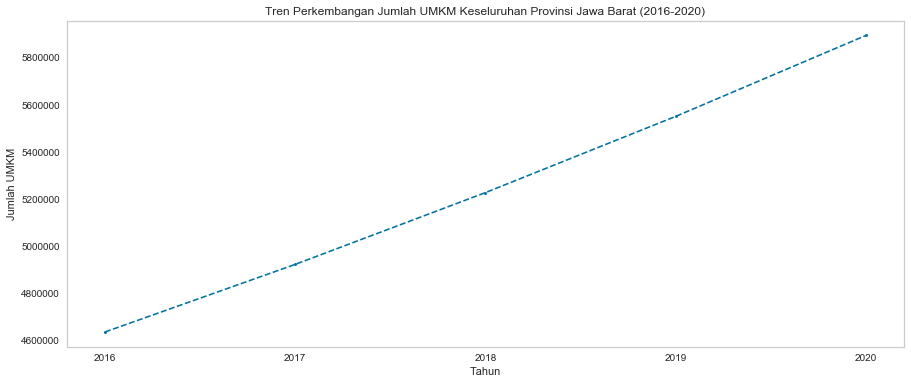

In [694]:
fig, ax = plt.subplots(1,1,figsize=(15,6))

corr_data_jabar_umkm.iloc[:-1, :].set_index('Tahun')['jumlah_umkm'].plot(kind='line', marker='o', linestyle='--', 
                                                            linewidth=1.6, markersize=3, ax=ax)

plt.title('Tren Perkembangan Jumlah UMKM Keseluruhan Provinsi Jawa Barat (2016-2020)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah UMKM')
plt.xticks(np.arange(2016,2021,1))
plt.grid()

### Tren Jumlah UMKM Kabupaten/Kota di Jawa Barat

Sumber Data: https://drive.google.com/drive/folders/1cf_DM9EKCSeN4AC9wcToVE9f1tX3kQe6

In [311]:
umkm_region = pd.read_csv('UMKM Jabar/diskuk-od_17372_jml_ush_mikro_kecil_menengah_umkm__kabupatenkota_data.csv')

In [312]:
umkm_region.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_umkm,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,375048,UNIT,2016
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,269002,UNIT,2016
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,250808,UNIT,2016
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,353277,UNIT,2016
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,259141,UNIT,2016


In [313]:
umkm_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   162 non-null    int64 
 1   kode_provinsi        162 non-null    int64 
 2   nama_provinsi        162 non-null    object
 3   kode_kabupaten_kota  162 non-null    int64 
 4   nama_kabupaten_kota  162 non-null    object
 5   jumlah_umkm          162 non-null    int64 
 6   satuan               162 non-null    object
 7   tahun                162 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 10.2+ KB


In [314]:
umkm_region.describe().T

,count,mean,std,min,25%,50%,75%,max
id,162.0,81.500000,46.909487,1.0,41.25,81.5,121.75,162.0
kode_provinsi,162.0,32.000000,0.000000,32.0,32.00,32.0,32.00,32.0
kode_kabupaten_kota,162.0,3231.333333,31.298602,3201.0,3207.00,3214.0,3273.00,3279.0
jumlah_umkm,162.0,200506.617284,116480.186111,25896.0,102917.00,191241.5,276270.00,506347.0
tahun,162.0,2018.500000,1.713121,2016.0,2017.00,2018.5,2020.00,2021.0


In [315]:
umkm_region.describe(include='object').T

,count,unique,top,freq
nama_provinsi,162,1,JAWA BARAT,162
nama_kabupaten_kota,162,27,KOTA BANDUNG,6
satuan,162,1,UNIT,162


In [316]:
umkm_region_pivot = umkm_region.pivot(index='nama_kabupaten_kota', columns='tahun', values='jumlah_umkm')
umkm_region_pivot['Kumulatif'] = umkm_region_pivot[2016] + umkm_region_pivot[2017] + umkm_region_pivot[2018] \
                                 + umkm_region_pivot[2019] + umkm_region_pivot[2020] + umkm_region_pivot[2021]

umkm_region_pivot = umkm_region_pivot.sort_values(by='Kumulatif', ascending=True)
umkm_region_pivot

tahun,2016,2017,2018,2019,2020,2021,Kumulatif
nama_kabupaten_kota,,,,,,,
KOTA BANJAR,25896,27498,29200,31006,32925,34962,181487
KOTA SUKABUMI,39982,42456,45083,47872,50834,53979,280206
KOTA CIREBON,40224,42713,45355,48162,51142,54306,281902
KOTA CIMAHI,56910,60431,64170,68141,72357,76833,398842
KABUPATEN PANGANDARAN,60293,64023,67985,72191,76658,81401,422551
KOTA BOGOR,86406,91752,97429,103457,109858,116656,605558
KABUPATEN PURWAKARTA,87246,92644,98376,104463,110926,117790,611445
KOTA TASIKMALAYA,91113,96750,102737,109093,115843,123010,638546
KABUPATEN KUNINGAN,94885,100756,106990,113609,120639,128103,664982


Text(0, 0.5, 'Daerah')

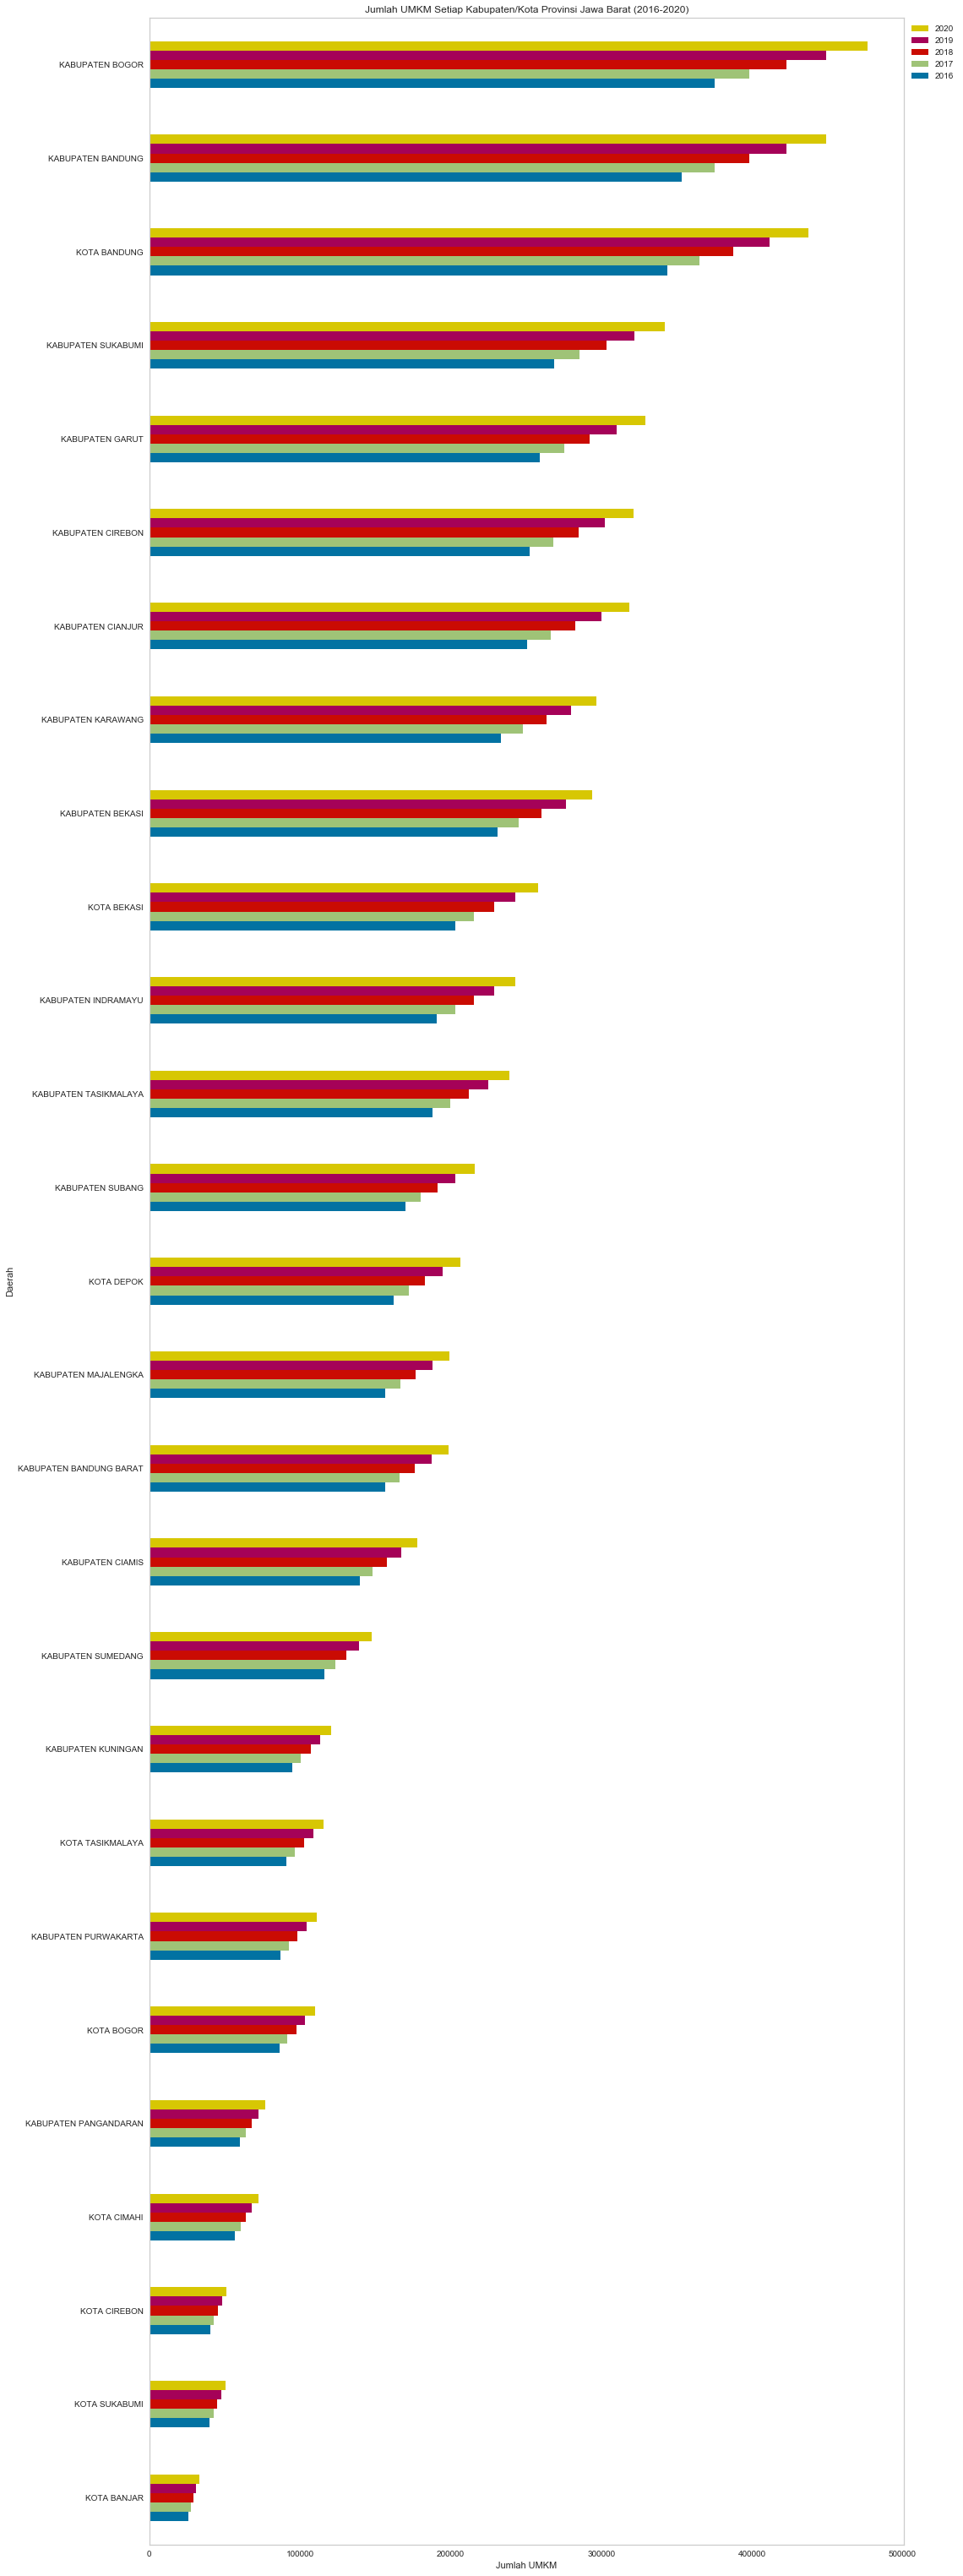

In [317]:
fig, ax = plt.subplots(1, 1, figsize=(16, 55))

umkm_region_pivot.iloc[:, :-2].plot(kind='barh', ax=ax)

handles,labels = ax.get_legend_handles_labels()

handles = [handles[4], handles[3], handles[2], handles[1], handles[0]]
labels = [labels[4], labels[3], labels[2], labels[1], labels[0]]

plt.grid()
plt.legend(handles=handles, labels=labels, loc="upper left", bbox_to_anchor=(1,1))
plt.title('Jumlah UMKM Setiap Kabupaten/Kota Provinsi Jawa Barat (2016-2020)')
plt.xlabel('Jumlah UMKM')
plt.ylabel('Daerah')

### Tren Jumlah UMKM Provinsi Jawa Barat Berdasarkan Jenis Usaha

Sumber Data: https://drive.google.com/drive/folders/1cf_DM9EKCSeN4AC9wcToVE9f1tX3kQe6

In [318]:
umkm_sector = pd.read_csv('UMKM Jabar/diskuk-od_17370_jml_ush_mikro_kecil_menengah_umkm__kategori_ush_data.csv')

In [319]:
umkm_sector.head()

,id,kode_provinsi,nama_provinsi,kategori_usaha,jumlah_umkm,satuan,tahun
0,1,32,JAWA BARAT,AKSESORIS,10789,UNIT,2016
1,2,32,JAWA BARAT,BATIK,10789,UNIT,2016
2,3,32,JAWA BARAT,BORDIR,1541,UNIT,2016
3,4,32,JAWA BARAT,CRAFT,385335,UNIT,2016
4,5,32,JAWA BARAT,FASHION,376087,UNIT,2016


In [320]:
umkm_sector.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              60 non-null     int64 
 1   kode_provinsi   60 non-null     int64 
 2   nama_provinsi   60 non-null     object
 3   kategori_usaha  60 non-null     object
 4   jumlah_umkm     60 non-null     int64 
 5   satuan          60 non-null     object
 6   tahun           60 non-null     int64 
dtypes: int64(4), object(3)
memory usage: 3.4+ KB


In [321]:
umkm_sector.describe().T

,count,mean,std,min,25%,50%,75%,max
id,60.0,30.50,17.464249,1.0,15.75,30.5,45.25,60.0
kode_provinsi,60.0,32.00,0.000000,32.0,32.00,32.0,32.00,32.0
jumlah_umkm,60.0,541367.95,622545.037782,1541.0,13718.00,343073.5,600051.25,2239092.0
tahun,60.0,2018.50,1.722237,2016.0,2017.00,2018.5,2020.00,2021.0


In [322]:
umkm_sector.describe(include='object').T

,count,unique,top,freq
nama_provinsi,60,1,JAWA BARAT,60
kategori_usaha,60,10,AKSESORIS,6
satuan,60,1,UNIT,60


In [323]:
umkm_sector_pivot = umkm_sector.pivot(index='tahun', columns='kategori_usaha', values='jumlah_umkm')
umkm_sector_pivot

kategori_usaha,AKSESORIS,BATIK,BORDIR,CRAFT,FASHION,JASA/LAINNYA,KONVEKSI,KULINER,MAKANAN,MINUMAN
tahun,,,,,,,,,,
2016,10789,10789,1541,385335,376087,524055,229660,1658481,1213034,225036
2017,11457,11457,1637,409176,399356,556480,243869,1761095,1288087,238959
2018,12166,12166,1738,434493,424065,590911,258958,1870058,1367784,253744
2019,12919,12919,1846,461376,450303,627472,274980,1985763,1452412,269444
2020,13718,13718,1960,489923,478164,666295,291994,2108627,1542276,286115
2021,14567,14567,2081,520235,507750,707520,310060,2239092,1637701,303817


In [324]:
# Managing Culinary Sector Data
umkm_sector_pivot.drop(['MAKANAN', 'MINUMAN'], axis=1, inplace=True)
umkm_sector_pivot

kategori_usaha,AKSESORIS,BATIK,BORDIR,CRAFT,FASHION,JASA/LAINNYA,KONVEKSI,KULINER
tahun,,,,,,,,
2016,10789,10789,1541,385335,376087,524055,229660,1658481
2017,11457,11457,1637,409176,399356,556480,243869,1761095
2018,12166,12166,1738,434493,424065,590911,258958,1870058
2019,12919,12919,1846,461376,450303,627472,274980,1985763
2020,13718,13718,1960,489923,478164,666295,291994,2108627
2021,14567,14567,2081,520235,507750,707520,310060,2239092


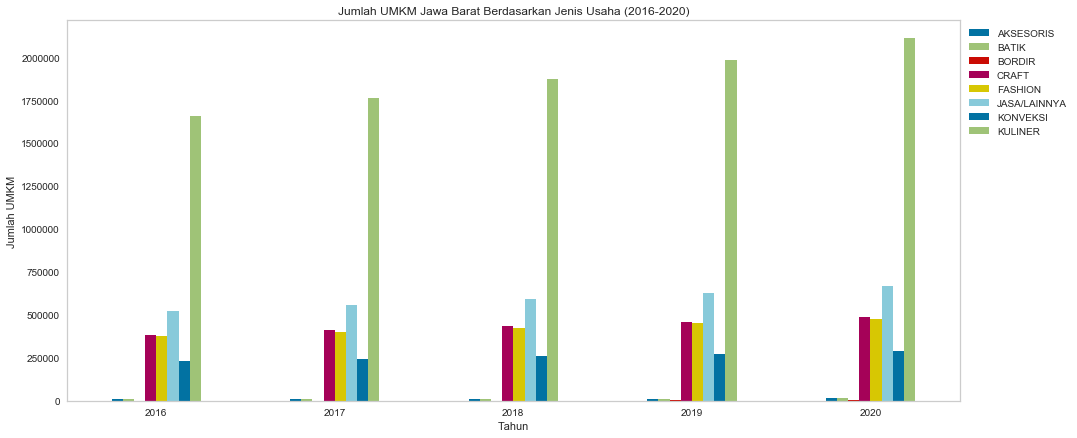

In [325]:
fig, ax = plt.subplots(1, 1, figsize=(16, 7))

umkm_sector_pivot.loc[:2020].plot(kind='bar', ax=ax)

plt.grid()
plt.title('Jumlah UMKM Jawa Barat Berdasarkan Jenis Usaha (2016-2020)')
plt.setp(ax.get_xticklabels(), rotation=0)
plt.xlabel('Tahun')
plt.ylabel('Jumlah UMKM')
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

Terlihat bahwa sektor kuliner menjadi sektor dengan jumlah yang paling mendominasi di Provinsi Jawa Barat di seluruh tahun pada periode 2016-2020.

In [326]:
umkm_sector_pivot_culinary = umkm_sector_pivot.copy()
umkm_sector_pivot_culinary['NON-KULINER'] = umkm_sector_pivot_culinary['AKSESORIS'] + umkm_sector_pivot_culinary['BATIK'] \
                                    + umkm_sector_pivot_culinary['BORDIR'] + umkm_sector_pivot_culinary['CRAFT'] \
                                    + umkm_sector_pivot_culinary['FASHION'] + umkm_sector_pivot_culinary['KONVEKSI'] \
                                    + umkm_sector_pivot_culinary['JASA/LAINNYA']
umkm_sector_pivot_culinary

kategori_usaha,AKSESORIS,BATIK,BORDIR,CRAFT,FASHION,JASA/LAINNYA,KONVEKSI,KULINER,NON-KULINER
tahun,,,,,,,,,
2016,10789,10789,1541,385335,376087,524055,229660,1658481,1538256
2017,11457,11457,1637,409176,399356,556480,243869,1761095,1633432
2018,12166,12166,1738,434493,424065,590911,258958,1870058,1734497
2019,12919,12919,1846,461376,450303,627472,274980,1985763,1841815
2020,13718,13718,1960,489923,478164,666295,291994,2108627,1955772
2021,14567,14567,2081,520235,507750,707520,310060,2239092,2076780


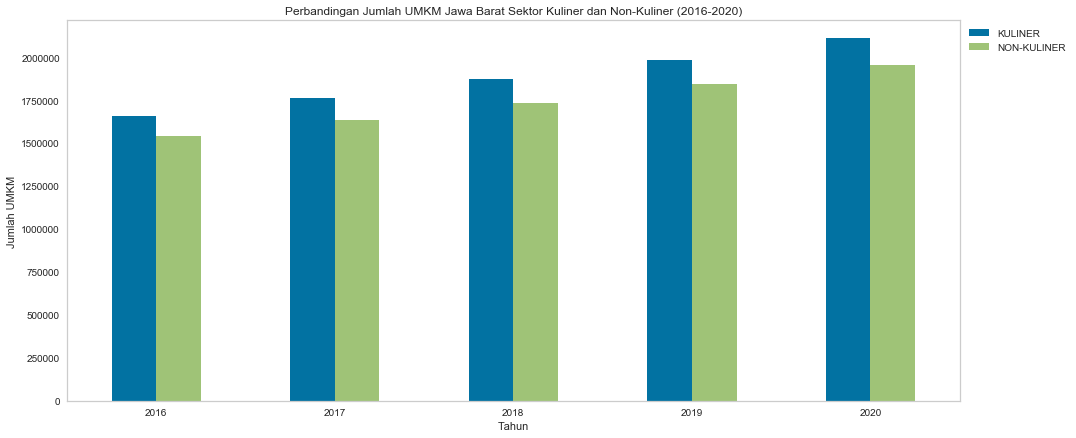

In [327]:
fig, ax = plt.subplots(1, 1, figsize=(16, 7))

umkm_sector_pivot_culinary[['KULINER', 'NON-KULINER']].loc[:2020].plot(kind='bar', ax=ax)

plt.grid()
plt.title('Perbandingan Jumlah UMKM Jawa Barat Sektor Kuliner dan Non-Kuliner (2016-2020)')
plt.setp(ax.get_xticklabels(), rotation=0)
plt.xlabel('Tahun')
plt.ylabel('Jumlah UMKM')
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

Grafik di atas menunjukkan hal yang menarik bahwa meskipun seluruh sektor non-kuliner dilakukan agregasi, jumlah sektor UMKM kuliner masih mendominasi UMKM Jawa Barat di setiap tahunnya pada periode 2016-2020.

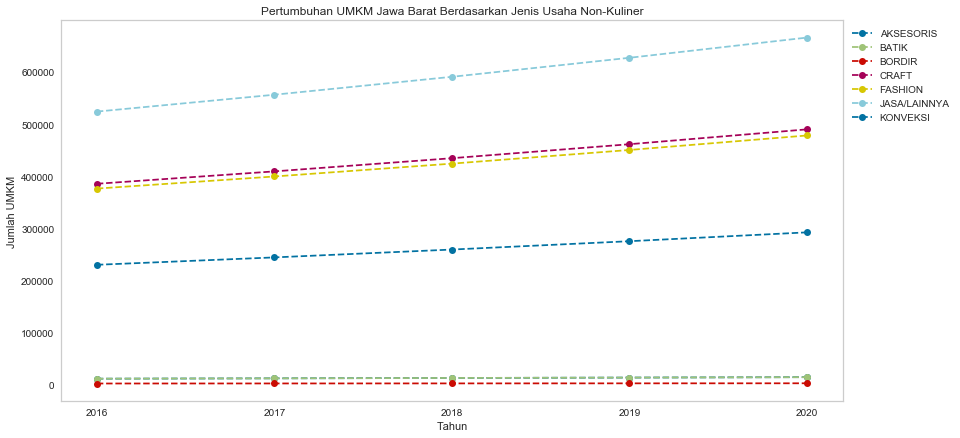

In [328]:
umkm_sector_pivot.loc[:2020, umkm_sector_pivot.columns != 'KULINER'].plot(kind='line', figsize=(14,7), marker='o', linestyle='--')

plt.xticks(np.arange(2016,2021,1))
plt.title('Pertumbuhan UMKM Jawa Barat Berdasarkan Jenis Usaha Non-Kuliner')
plt.xlabel('Tahun')
plt.ylabel('Jumlah UMKM')
plt.grid()
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

Terlihat bahwa sektor jasa dan kerajinan yang memiliki laju pertumbuhan yang konsisten dengan sektor jasa menjadi sektor yang mendominasi jumlah UMKM non-kuliner di Jawa Barat. Meskipun demikian, terlihat bahwa sektor batik, bordir, dan aksesoris mengalami pertumbuhan yang stagnan dengan jumlahnya pun yang masih sangat rendah dibandingkan sektor lainnya di Jawa Barat pada periode 2016-2020.

### C. Analisis Kondisi Terkini UMKM di Jawa Barat

In [329]:
umkm_jabar_current = corr_data_jabar_umkm['jumlah_umkm'].loc[corr_data_jabar_umkm['Tahun'] == 2021][5]
print(f'Jumlah UMKM Jawa Barat kumulatif tahun 2021: {umkm_jabar_current} UMKM')

Jumlah UMKM Jawa Barat kumulatif tahun 2021: 6257390 UMKM


In [330]:
umkm_region_pivot.iloc[:, -2]

nama_kabupaten_kota
KOTA BANJAR                 34962
KOTA SUKABUMI               53979
KOTA CIREBON                54306
KOTA CIMAHI                 76833
KABUPATEN PANGANDARAN       81401
KOTA BOGOR                 116656
KABUPATEN PURWAKARTA       117790
KOTA TASIKMALAYA           123010
KABUPATEN KUNINGAN         128103
KABUPATEN SUMEDANG         156884
KABUPATEN CIAMIS           188633
KABUPATEN BANDUNG BARAT    211001
KABUPATEN MAJALENGKA       211749
KOTA DEPOK                 219238
KABUPATEN SUBANG           229215
KABUPATEN TASIKMALAYA      253908
KABUPATEN INDRAMAYU        257929
KOTA BEKASI                274143
KABUPATEN BEKASI           311927
KABUPATEN KARAWANG         315388
KABUPATEN CIANJUR          338612
KABUPATEN CIREBON          341037
KABUPATEN GARUT            349863
KABUPATEN SUKABUMI         363176
KOTA BANDUNG               464346
KABUPATEN BANDUNG          476954
KABUPATEN BOGOR            506347
Name: 2021, dtype: int64

Text(0, 0.5, 'Daerah')

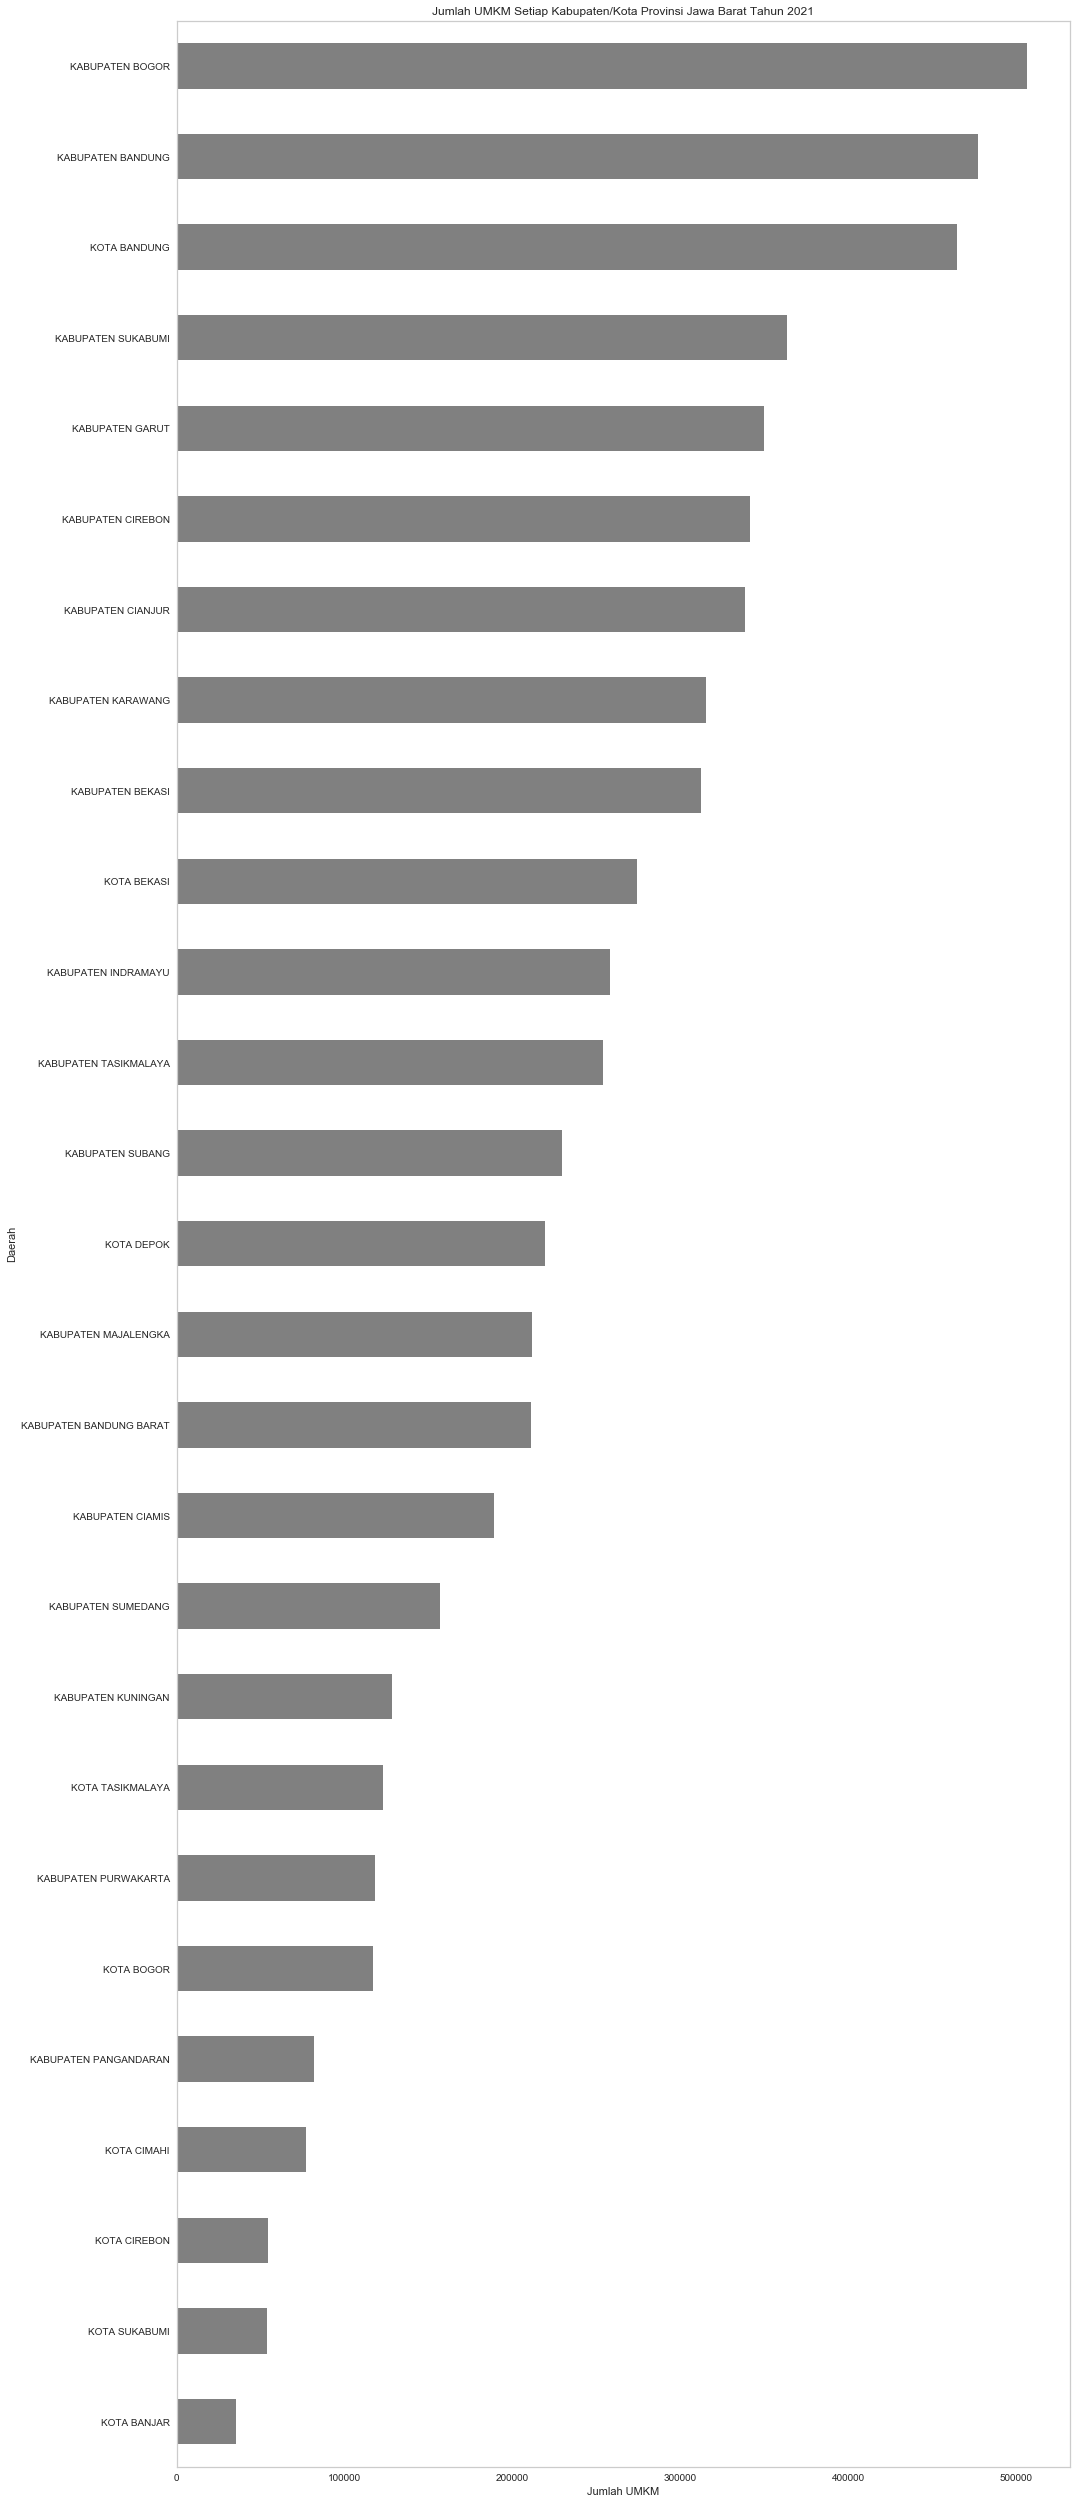

In [331]:
fig, ax = plt.subplots(1, 1, figsize=(16, 45))

umkm_region_pivot.iloc[:, -2].plot(kind='barh', ax=ax, color='grey')

plt.grid()
plt.title('Jumlah UMKM Setiap Kabupaten/Kota Provinsi Jawa Barat Tahun 2021')
plt.xlabel('Jumlah UMKM')
plt.ylabel('Daerah')

In [332]:
umkm_sector_pivot_viz = umkm_sector_pivot.copy()
umkm_sector_pivot_viz['BATIK & AKSESORIS'] = umkm_sector_pivot_viz['AKSESORIS'] + umkm_sector_pivot_viz['BATIK'] \
                                               + umkm_sector_pivot_viz['BORDIR']
umkm_sector_pivot_viz.drop(['AKSESORIS', 'BATIK', 'BORDIR'], axis=1, inplace=True)
umkm_sector_pivot_viz

kategori_usaha,CRAFT,FASHION,JASA/LAINNYA,KONVEKSI,KULINER,BATIK & AKSESORIS
tahun,,,,,,
2016,385335,376087,524055,229660,1658481,23119
2017,409176,399356,556480,243869,1761095,24551
2018,434493,424065,590911,258958,1870058,26070
2019,461376,450303,627472,274980,1985763,27684
2020,489923,478164,666295,291994,2108627,29396
2021,520235,507750,707520,310060,2239092,31215


In [333]:
umkm_sector_pivot_viz.iloc[-1, :]

kategori_usaha
CRAFT                 520235
FASHION               507750
JASA/LAINNYA          707520
KONVEKSI              310060
KULINER              2239092
BATIK & AKSESORIS      31215
Name: 2021, dtype: int64

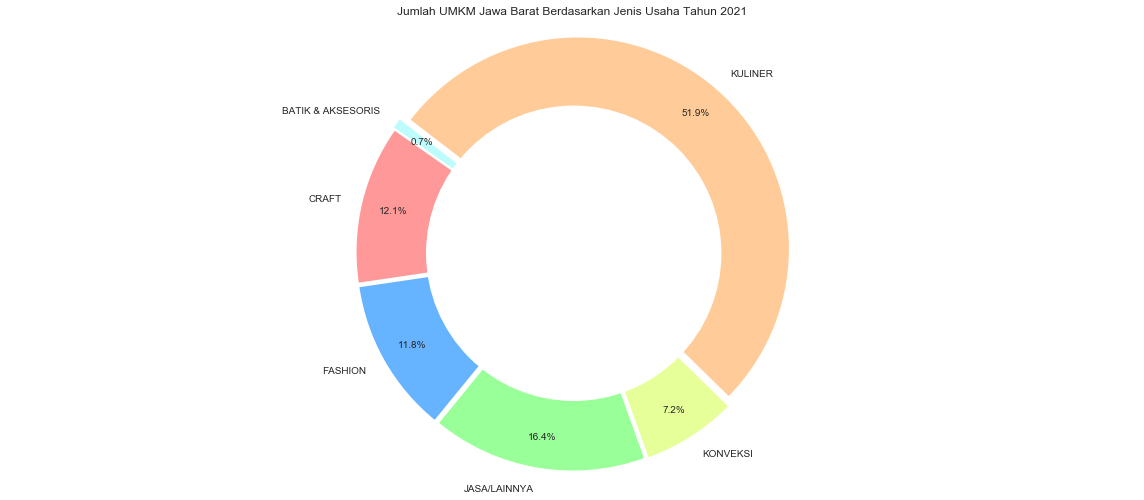

In [334]:
fig, ax = plt.subplots(1, 1, figsize=(16, 7))

colors = ['#ff9999','#66b3ff','#99ff99','#e7ff99', '#ffcc99', '#bdfbfc']
labels = umkm_sector_pivot_viz.iloc[-1, :].index
explodes = (0.03,0.03,0.03,0.03,0.03,0.04)
 
ax.pie(umkm_sector_pivot_viz.iloc[-1, :], colors = colors, labels=labels, autopct='%1.1f%%', 
       startangle=145, pctdistance=0.85, explode = explodes)

centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.axis('equal')  
plt.title('Jumlah UMKM Jawa Barat Berdasarkan Jenis Usaha Tahun 2021')
plt.tight_layout()

In [335]:
umkm_sector_pivot.iloc[-1, :-1]

kategori_usaha
AKSESORIS        14567
BATIK            14567
BORDIR            2081
CRAFT           520235
FASHION         507750
JASA/LAINNYA    707520
KONVEKSI        310060
Name: 2021, dtype: int64

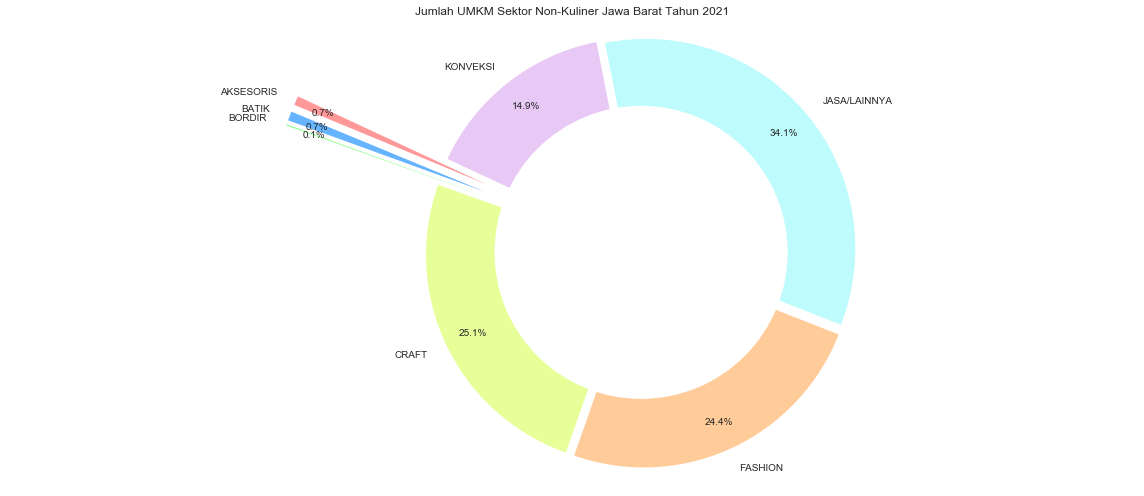

In [336]:
fig, ax = plt.subplots(1, 1, figsize=(16, 7))

colors = ['#ff9999','#66b3ff','#99ff99','#e7ff99', '#ffcc99', '#bdfbfc', '#e8c9f5']
labels = umkm_sector_pivot.iloc[-1, :-1].index
explodes = (0.8,0.8,0.8,0.03,0.03,0.03,0.03)
 
ax.pie(umkm_sector_pivot.iloc[-1, :-1], colors = colors, labels=labels, autopct='%1.1f%%', 
       startangle=155, pctdistance=0.86, explode = explodes)

centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.axis('equal')  
plt.title('Jumlah UMKM Sektor Non-Kuliner Jawa Barat Tahun 2021')
plt.tight_layout()

### D. Klusterisasi UMKM Berdasarkan Daerah Kabupaten/Kota di Jawa Barat 

Sumber Data:
- https://drive.google.com/drive/folders/1cf_DM9EKCSeN4AC9wcToVE9f1tX3kQe6
- https://drive.google.com/drive/folders/1zs42MkAcpfS6qP_wc3Eyjo3qU7ZOv0iB
- https://drive.google.com/drive/folders/1b0GPENfCOmZN5tdpCWOe7P7QOf2tiLNs

#### Data Jumlah UMKM

In [337]:
umkm_region_2021 = umkm_region_pivot.iloc[:, -2].reset_index()
umkm_region_2021.rename(columns={'nama_kabupaten_kota': 'Daerah', 2021: 'Jumlah UMKM'}, inplace=True)
umkm_region_2021

,Daerah,Jumlah UMKM
0,KOTA BANJAR,34962
1,KOTA SUKABUMI,53979
2,KOTA CIREBON,54306
3,KOTA CIMAHI,76833
4,KABUPATEN PANGANDARAN,81401
5,KOTA BOGOR,116656
6,KABUPATEN PURWAKARTA,117790
7,KOTA TASIKMALAYA,123010
8,KABUPATEN KUNINGAN,128103
9,KABUPATEN SUMEDANG,156884


#### Data Kemiskinan

In [338]:
pov_jabar2 = pov_percent_jabar_pivot2.copy().reset_index()
pov_jabar2.rename(columns={'nama_kabupaten_kota': 'Daerah'}, inplace=True)
pov_jabar2['Mean'] = (pov_jabar2[2019]+pov_jabar2[2020]) / 2
pov_jabar2

tahun,Daerah,2016,2017,2018,2019,2020,Mean
0,KOTA DEPOK,2.34,2.34,2.14,2.07,2.45,2.260
1,KOTA BANDUNG,4.32,4.17,3.57,3.38,3.99,3.685
2,KOTA BEKASI,5.06,4.79,4.11,3.81,4.38,4.095
3,KABUPATEN BEKASI,4.92,4.73,4.37,4.01,4.82,4.415
4,KOTA CIMAHI,5.92,5.76,4.94,4.39,5.11,4.750
5,KOTA BANJAR,7.01,7.06,5.70,5.50,6.09,5.795
6,KOTA BOGOR,7.29,7.11,5.93,5.77,6.68,6.225
7,KABUPATEN BANDUNG,7.61,7.36,6.65,5.94,6.91,6.425
8,KABUPATEN SUKABUMI,8.13,8.04,6.76,6.22,7.09,6.655
9,KABUPATEN CIAMIS,8.42,8.20,7.22,6.65,7.62,7.135


In [339]:
umkm_region_2021 = umkm_region_pivot.iloc[:, -2].reset_index()
umkm_region_2021.rename(columns={'nama_kabupaten_kota': 'Daerah', 2021: 'Jumlah UMKM'}, inplace=True)
umkm_region_2021 = umkm_region_2021.merge(pov_jabar2[['Daerah', 'Mean']], on='Daerah')
umkm_region_2021.rename(columns={'Mean': 'Tingkat Kemiskinan'}, inplace=True)
umkm_region_2021

,Daerah,Jumlah UMKM,Tingkat Kemiskinan
0,KOTA BANJAR,34962,5.795
1,KOTA SUKABUMI,53979,7.185
2,KOTA CIREBON,54306,8.965
3,KOTA CIMAHI,76833,4.750
4,KABUPATEN PANGANDARAN,81401,8.350
5,KOTA BOGOR,116656,6.225
6,KABUPATEN PURWAKARTA,117790,7.875
7,KOTA TASIKMALAYA,123010,12.285
8,KABUPATEN KUNINGAN,128103,12.115
9,KABUPATEN SUMEDANG,156884,9.655


#### Data Pengangguran

In [340]:
unemp_jabar2 = pd.read_csv('Pengangguran Jabar/unemp_jabar.csv')
unemp_jabar2 = unemp_jabar2.drop('Unnamed: 0', axis=1)
unemp_jabar2

,Daerah,2016,2017,2018,2019,2020,Rata-Rata
0,KABUPATEN BOGOR,10.01,9.55,9.83,9.11,14.29,11.700
1,KABUPATEN SUKABUMI,10.05,7.66,7.84,8.05,9.60,8.825
2,KABUPATEN CIANJUR,10.06,10.10,10.23,9.81,11.05,10.430
3,KABUPATEN BANDUNG,4.03,3.92,5.07,5.51,8.58,7.045
4,KABUPATEN GARUT,6.50,7.86,7.12,7.35,8.95,8.150
5,KABUPATEN TASIKMALAYA,8.51,6.61,6.92,6.31,7.12,6.715
6,KABUPATEN CIAMIS,6.99,5.17,4.64,5.16,5.66,5.410
7,KABUPATEN KUNINGAN,7.49,7.94,9.10,9.68,11.22,10.450
8,KABUPATEN CIREBON,10.51,9.61,10.64,10.35,11.52,10.935
9,KABUPATEN MAJALENGKA,4.01,5.02,5.00,4.37,5.84,5.105


In [341]:
umkm_region_2021 = umkm_region_2021.merge(unemp_jabar2[['Daerah', 'Rata-Rata']], on='Daerah')
umkm_region_2021.rename(columns={'Rata-Rata': 'Tingkat Pengangguran'}, inplace=True)
umkm_region_2021

,Daerah,Jumlah UMKM,Tingkat Kemiskinan,Tingkat Pengangguran
0,KOTA BANJAR,34962,5.795,6.445
1,KOTA SUKABUMI,53979,7.185,10.330
2,KOTA CIREBON,54306,8.965,10.005
3,KOTA CIMAHI,76833,4.750,10.695
4,KABUPATEN PANGANDARAN,81401,8.350,4.800
5,KOTA BOGOR,116656,6.225,10.920
6,KABUPATEN PURWAKARTA,117790,7.875,10.400
7,KOTA TASIKMALAYA,123010,12.285,7.385
8,KABUPATEN KUNINGAN,128103,12.115,10.450
9,KABUPATEN SUMEDANG,156884,9.655,8.795


#### Data Laju Pertumbuhan UMKM

In [342]:
umkm_growth = umkm_region_pivot.copy().reset_index()
umkm_growth[2021] = umkm_growth[2021]-umkm_growth[2020]
umkm_growth[2020] = umkm_growth[2020]-umkm_growth[2019]
umkm_growth[2019] = umkm_growth[2019]-umkm_growth[2018]
umkm_growth[2018] = umkm_growth[2018]-umkm_growth[2017]
umkm_growth[2017] = umkm_growth[2017]-umkm_growth[2016]
umkm_growth['Kumulatif'] = (umkm_growth[2017]+umkm_growth[2018]+umkm_growth[2019]+umkm_growth[2020]+umkm_growth[2021]) / 5
umkm_growth = umkm_growth.drop(2016, axis=1)
umkm_growth.rename(columns={'nama_kabupaten_kota': 'Daerah', 'Kumulatif': 'Mean'}, inplace=True)
umkm_growth

tahun,Daerah,2017,2018,2019,2020,2021,Mean
0,KOTA BANJAR,1602,1702,1806,1919,2037,1813.2
1,KOTA SUKABUMI,2474,2627,2789,2962,3145,2799.4
2,KOTA CIREBON,2489,2642,2807,2980,3164,2816.4
3,KOTA CIMAHI,3521,3739,3971,4216,4476,3984.6
4,KABUPATEN PANGANDARAN,3730,3962,4206,4467,4743,4221.6
5,KOTA BOGOR,5346,5677,6028,6401,6798,6050.0
6,KABUPATEN PURWAKARTA,5398,5732,6087,6463,6864,6108.8
7,KOTA TASIKMALAYA,5637,5987,6356,6750,7167,6379.4
8,KABUPATEN KUNINGAN,5871,6234,6619,7030,7464,6643.6
9,KABUPATEN SUMEDANG,7190,7634,8107,8609,9141,8136.2


In [343]:
umkm_region_2021 = umkm_region_2021.merge(umkm_growth[['Daerah', 'Mean']], on='Daerah')
umkm_region_2021.rename(columns={'Mean': 'Laju Pertumbuhan UMKM'}, inplace=True)
umkm_region_2021

,Daerah,Jumlah UMKM,Tingkat Kemiskinan,Tingkat Pengangguran,Laju Pertumbuhan UMKM
0,KOTA BANJAR,34962,5.795,6.445,1813.2
1,KOTA SUKABUMI,53979,7.185,10.330,2799.4
2,KOTA CIREBON,54306,8.965,10.005,2816.4
3,KOTA CIMAHI,76833,4.750,10.695,3984.6
4,KABUPATEN PANGANDARAN,81401,8.350,4.800,4221.6
5,KOTA BOGOR,116656,6.225,10.920,6050.0
6,KABUPATEN PURWAKARTA,117790,7.875,10.400,6108.8
7,KOTA TASIKMALAYA,123010,12.285,7.385,6379.4
8,KABUPATEN KUNINGAN,128103,12.115,10.450,6643.6
9,KABUPATEN SUMEDANG,156884,9.655,8.795,8136.2


#### Eksplorasi Keseluruhan Dataset

In [344]:
umkm_region_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Daerah                 27 non-null     object 
 1   Jumlah UMKM            27 non-null     int64  
 2   Tingkat Kemiskinan     27 non-null     float64
 3   Tingkat Pengangguran   27 non-null     float64
 4   Laju Pertumbuhan UMKM  27 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.3+ KB


In [345]:
umkm_region_2021.describe().T

,count,mean,std,min,25%,50%,75%,max
Jumlah UMKM,27.0,231755.185185,133918.720882,34962.00,120400.000,219238.000,327000.0000,506347.000
Tingkat Kemiskinan,27.0,7.915741,2.671636,2.26,6.325,7.875,9.7425,12.285
Tingkat Pengangguran,27.0,8.914259,1.945926,4.80,7.690,9.490,10.4150,11.700
Laju Pertumbuhan UMKM,27.0,12019.133333,6945.192061,1813.20,6244.100,11370.000,16958.6000,26259.800


In [346]:
umkm_region_2021.describe(include='object')

,Daerah
count,27
unique,27
top,KOTA BANDUNG
freq,1


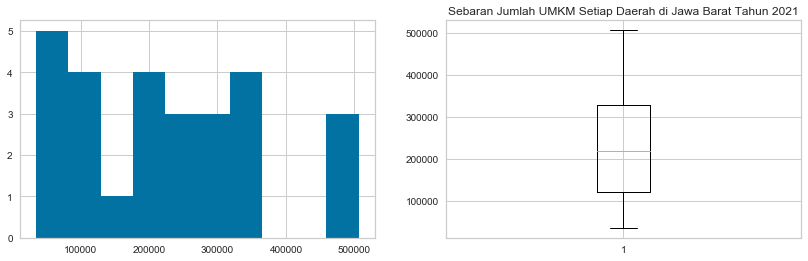

In [347]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
plt.title('Sebaran Jumlah UMKM Setiap Daerah di Jawa Barat Tahun 2021')
ax1.hist(umkm_region_2021['Jumlah UMKM'], density=False)
ax2.boxplot(umkm_region_2021['Jumlah UMKM'])
plt.show()

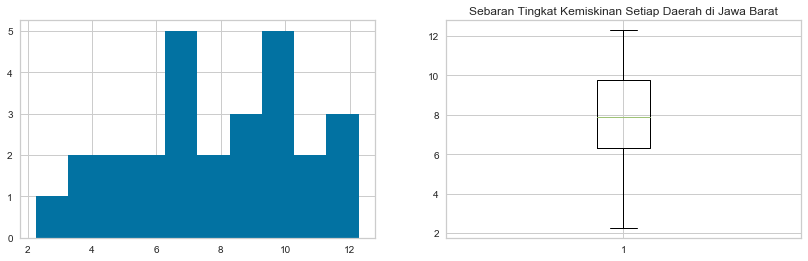

In [348]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
plt.title('Sebaran Tingkat Kemiskinan Setiap Daerah di Jawa Barat')
ax1.hist(umkm_region_2021['Tingkat Kemiskinan'], density=False)
ax2.boxplot(umkm_region_2021['Tingkat Kemiskinan'])
plt.show()

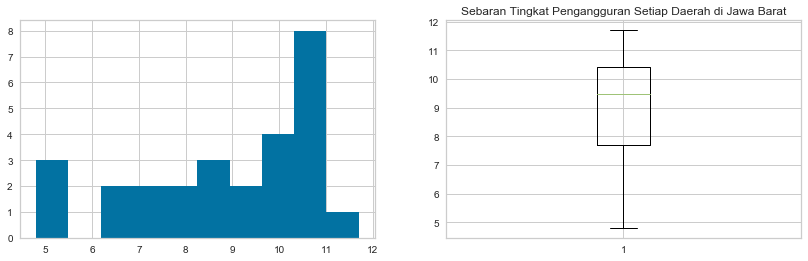

In [349]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
plt.title('Sebaran Tingkat Pengangguran Setiap Daerah di Jawa Barat')
ax1.hist(umkm_region_2021['Tingkat Pengangguran'], density=False)
ax2.boxplot(umkm_region_2021['Tingkat Pengangguran'])
plt.show()

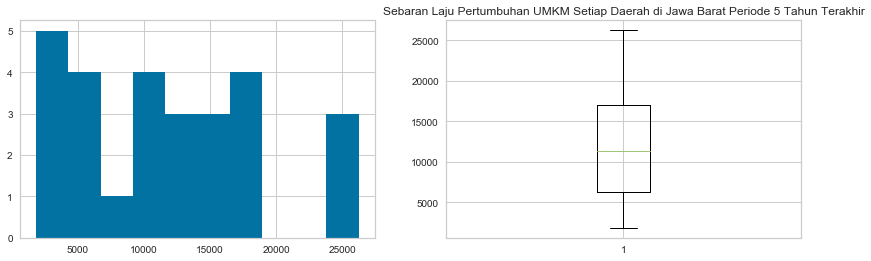

In [350]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
plt.title('Sebaran Laju Pertumbuhan UMKM Setiap Daerah di Jawa Barat Periode 5 Tahun Terakhir')
ax1.hist(umkm_region_2021['Laju Pertumbuhan UMKM'], density=False)
ax2.boxplot(umkm_region_2021['Laju Pertumbuhan UMKM'])
plt.show()

### Tahap Klusterisasi UMKM Berdasarkan Daerah Kabupaten/Kota Provinsi Jawa Barat

In [351]:
cluster_dataset_region = umkm_region_2021.set_index('Daerah')

# Dilakukan standardisasi untuk membantu meningkatkan performa clustering
scaler = StandardScaler() 

# fit_transform
cluster_dataset_region_scaled = scaler.fit_transform(cluster_dataset_region)

cluster_dataset_region_scaled = pd.DataFrame(cluster_dataset_region_scaled)
cluster_dataset_region_scaled.columns = cluster_dataset_region.columns
cluster_dataset_region_scaled['Daerah'] = cluster_dataset_region.index
cluster_dataset_region_scaled.set_index('Daerah', inplace=True)
cluster_dataset_region_scaled

,Jumlah UMKM,Tingkat Kemiskinan,Tingkat Pengangguran,Laju Pertumbuhan UMKM
Daerah,,,,
KOTA BANJAR,-1.497490,-0.808920,-1.293110,-1.497489
KOTA SUKABUMI,-1.352781,-0.278728,0.741400,-1.352787
KOTA CIREBON,-1.350293,0.400222,0.571203,-1.350292
KOTA CIMAHI,-1.178874,-1.207517,0.932545,-1.178885
KABUPATEN PANGANDARAN,-1.144114,0.165641,-2.154570,-1.144111
KOTA BOGOR,-0.875843,-0.644904,1.050373,-0.875835
KABUPATEN PURWAKARTA,-0.867214,-0.015540,0.778058,-0.867207
KOTA TASIKMALAYA,-0.827492,1.666578,-0.800848,-0.827503
KABUPATEN KUNINGAN,-0.788737,1.601735,0.804242,-0.788738


### Visualisasi Data Multidimensi dengan Reduksi Dimensi (PCA)

In [690]:
from sklearn.decomposition import PCA

# Dimensi data direduksi menjadi 2 dimensi untuk dilakukan visualisasi
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(cluster_dataset_region_scaled)
principalDf = pd.DataFrame(data = principalComponents, columns = ['Principal Component 1', 'Principal Component 2'])
principalDf

,Principal Component 1,Principal Component 2
0,-2.150423,0.458071
1,-1.590219,1.238005
2,-1.764592,0.634923
3,-1.122900,1.961194
4,-2.073864,-0.932387
5,-0.802354,1.488232
6,-0.982150,0.857099
7,-1.638348,-1.352331
8,-1.199515,-0.349417
9,-0.915759,-0.279300


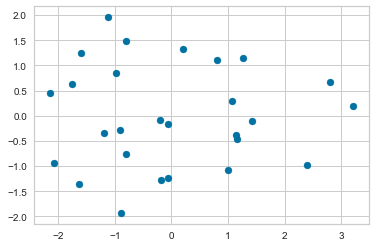

In [693]:
# Visualisasi PCA
plt.scatter(principalDf['Principal Component 1'], principalDf['Principal Component 2'])

#### Klusterisasi dengan K-Means Clustering

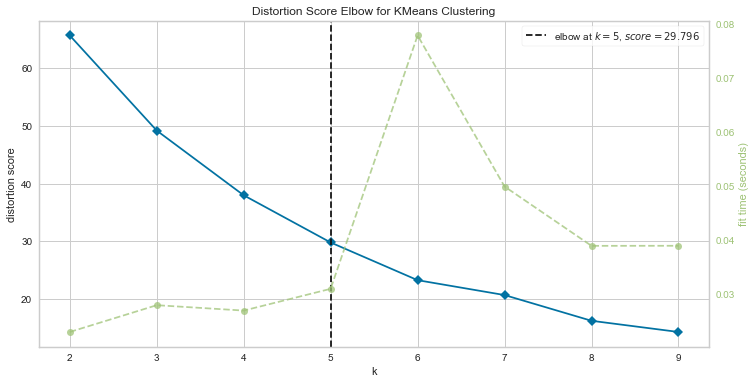

In [614]:
model = KMeans(random_state=2021)

fig, ax = plt.subplots(1,1,figsize=(12,6))
visualizer = KElbowVisualizer(model, k=(2,10), ax=ax)
visualizer.fit(cluster_dataset_region_scaled)
visualizer.show() 

In [615]:
# Elbow - Silhouette Score Method

wss = []
silhouette = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=100)
    kmeans.fit(cluster_dataset_region_scaled)
    
    # In sklearn, WSS score already calculated on inertia_values
    wss.append(kmeans.inertia_)
    
    # Silhouette scoring
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(cluster_dataset_region_scaled, cluster_labels)
    silhouette.append((num_clusters, silhouette_avg))
    
for item in silhouette:
    print("For n_clusters={}, the silhouette score is {}".format(item[0], item[1]))

For n_clusters=2, the silhouette score is 0.3183345009711462
For n_clusters=3, the silhouette score is 0.3072940493302796
For n_clusters=4, the silhouette score is 0.2719671189333348
For n_clusters=5, the silhouette score is 0.29353117376150245
For n_clusters=6, the silhouette score is 0.3102947236229945
For n_clusters=7, the silhouette score is 0.31502137738051306
For n_clusters=8, the silhouette score is 0.30563995117478354
For n_clusters=9, the silhouette score is 0.29634314470567


Dari metode Elbow, diperoleh jumlah kluster yang optimum sebanyak 5 kluster dengan skor silhouette sebesar 0.306. Terdapat opsi jumlah kluster lain yang memungkinkan dari metode skor silhouette seperti 3, 7, dan 8 kluster. Namun, dengan mempertimbangkan jumlah data yang relatif sedikit, akan digunakan 5 kluster untuk menentukan karakteristik kelompok data.

In [648]:
kmeans = KMeans(n_clusters=5, n_init=30, max_iter=200, random_state=2021)
kmeans.fit(cluster_dataset_region_scaled)

clustered_dataset_region = cluster_dataset_region_scaled.copy()
clustered_dataset_region['Kluster'] = kmeans.labels_
clustered_dataset_region

,Jumlah UMKM,Tingkat Kemiskinan,Tingkat Pengangguran,Laju Pertumbuhan UMKM,Kluster
Daerah,,,,,
KOTA BANJAR,-1.497490,-0.808920,-1.293110,-1.497489,3
KOTA SUKABUMI,-1.352781,-0.278728,0.741400,-1.352787,2
KOTA CIREBON,-1.350293,0.400222,0.571203,-1.350292,2
KOTA CIMAHI,-1.178874,-1.207517,0.932545,-1.178885,2
KABUPATEN PANGANDARAN,-1.144114,0.165641,-2.154570,-1.144111,3
KOTA BOGOR,-0.875843,-0.644904,1.050373,-0.875835,2
KABUPATEN PURWAKARTA,-0.867214,-0.015540,0.778058,-0.867207,2
KOTA TASIKMALAYA,-0.827492,1.666578,-0.800848,-0.827503,3
KABUPATEN KUNINGAN,-0.788737,1.601735,0.804242,-0.788738,2


In [649]:
score = silhouette_score(cluster_dataset_region_scaled, kmeans.labels_)
print(f"Silhouette score is: {score}")

Silhouette score is: 0.31504013599434455


In [650]:
clustered_dataset_region.sort_values('Kluster', ascending=True)

,Jumlah UMKM,Tingkat Kemiskinan,Tingkat Pengangguran,Laju Pertumbuhan UMKM,Kluster
Daerah,,,,,
KABUPATEN INDRAMAYU,0.199169,1.521634,-0.070309,0.199177,0
KABUPATEN SUBANG,-0.019329,0.304864,0.086796,-0.019329,0
KABUPATEN KARAWANG,0.636401,-0.034611,0.882795,0.636395,0
KABUPATEN GARUT,0.898737,0.596660,-0.400230,0.898744,0
KABUPATEN BANDUNG BARAT,-0.157928,0.770211,0.696887,-0.157927,0
KABUPATEN CIANJUR,0.813123,0.701554,0.793768,0.813114,0
KABUPATEN CIREBON,0.831576,1.020050,1.058229,0.831572,0
KABUPATEN BEKASI,0.610064,-1.335297,0.709979,0.610073,1
KOTA DEPOK,-0.095249,-2.157284,-0.481401,-0.095246,1


#### Analisis Profil Kluster: Jumlah UMKM

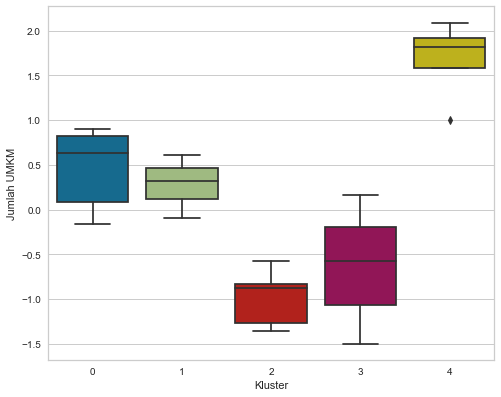

In [618]:
fig, ax = plt.subplots(1,1,figsize=(8,6.5))
sns.boxplot(x='Kluster', y='Jumlah UMKM', data=clustered_dataset_region, ax=ax)

Hasil klusterisasi menunjukkan bahwa daerah dengan kluster 4 memiliki jumlah UMKM yang jauh lebih besar dibandingkan dengan kluster lainnya dengan kluster 1 dan kluster 3 memiliki jumlah UMKM yang serupa. Hal menarik yang dapat diperoleh adalah masih minimnya jumlah UMKM pada daerah-daerah yang tergolong dalam kluster 2 yang ditunjukkan oleh nilai median yang paling rendah dengan sebaran data yang relatif lebih sempit. Artinya, kluster 2 perlu untuk mendapat prioritas yang lebih dalam usaha pengembangan UMKM daerah di Provinsi Jawa Barat.

In [619]:
# List Daerah Kluster 2
clustered_dataset_region.loc[clustered_dataset_region['Kluster'] == 2].index

Index(['KOTA SUKABUMI', 'KOTA CIREBON', 'KOTA CIMAHI', 'KOTA BOGOR',
       'KABUPATEN PURWAKARTA', 'KABUPATEN KUNINGAN', 'KABUPATEN SUMEDANG'],
      dtype='object', name='Daerah')

#### Analisis Profil Kluster: Tingkat Kemiskinan

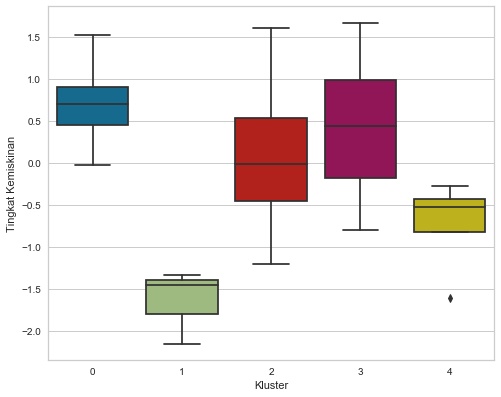

In [620]:
fig, ax = plt.subplots(1,1,figsize=(8,6.5))
sns.boxplot(x='Kluster', y='Tingkat Kemiskinan', data=clustered_dataset_region, ax=ax)

Hasil klusterisasi menunjukkan bahwa kluster 1 memiliki tingkat kemiskinan yang relatif rendah dibandingkan dengan kluster lainnya. Sementara itu, kluster 3 menjadi kluster dengan nilai median tingkat kemiskinan yang paling tinggi dan sebaran data yang relatif sempit, diikuti dengan kluster 0 dan 2. Artinya, daerah pada kluster 0, 2, dan 3 perlu mendapatkan prioritas penanganan tingkat kemiskinan yang lebih baik ke depannya.

In [621]:
# List Daerah Kluster 0, 2, dan 3
clustered_dataset_region.loc[(clustered_dataset_region['Kluster'] == 0)
                            | (clustered_dataset_region['Kluster'] == 2)
                            | (clustered_dataset_region['Kluster'] == 3)]['Kluster']

Daerah
KOTA BANJAR                3
KOTA SUKABUMI              2
KOTA CIREBON               2
KOTA CIMAHI                2
KABUPATEN PANGANDARAN      3
KOTA BOGOR                 2
KABUPATEN PURWAKARTA       2
KOTA TASIKMALAYA           3
KABUPATEN KUNINGAN         2
KABUPATEN SUMEDANG         2
KABUPATEN CIAMIS           3
KABUPATEN BANDUNG BARAT    0
KABUPATEN MAJALENGKA       3
KABUPATEN SUBANG           0
KABUPATEN TASIKMALAYA      3
KABUPATEN INDRAMAYU        0
KABUPATEN KARAWANG         0
KABUPATEN CIANJUR          0
KABUPATEN CIREBON          0
KABUPATEN GARUT            0
Name: Kluster, dtype: int32

#### Analisis Profil Kluster: Tingkat Pengangguran

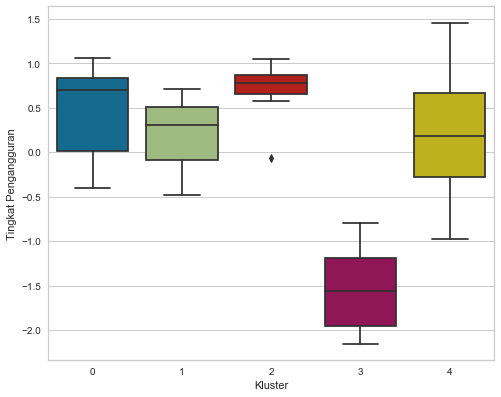

In [622]:
fig, ax = plt.subplots(1,1,figsize=(8,6.5))
sns.boxplot(x='Kluster', y='Tingkat Pengangguran', data=clustered_dataset_region, ax=ax)

Hasil klusterisasi menunjukkan bahwa kluster 0 memiliki tingkat pengangguran yang relatif rendah dibandingkan dengan kluster lainnya. Hal menarik yang dapat diperoleh adalah kluster 2 menjadi kluster dengan nilai median tingkat pengangguran yang paling tinggi dan sebaran data yang relatif sempit. Artinya, daerah 2 perlu mendapatkan prioritas penanganan tingkat pengangguran yang lebih baik ke depannya.

In [623]:
# List Daerah Kluster 2
clustered_dataset_region.loc[clustered_dataset_region['Kluster'] == 2].index

Index(['KOTA SUKABUMI', 'KOTA CIREBON', 'KOTA CIMAHI', 'KOTA BOGOR',
       'KABUPATEN PURWAKARTA', 'KABUPATEN KUNINGAN', 'KABUPATEN SUMEDANG'],
      dtype='object', name='Daerah')

#### Analisis Profil Kluster: Laju Pertumbuhan UMKM

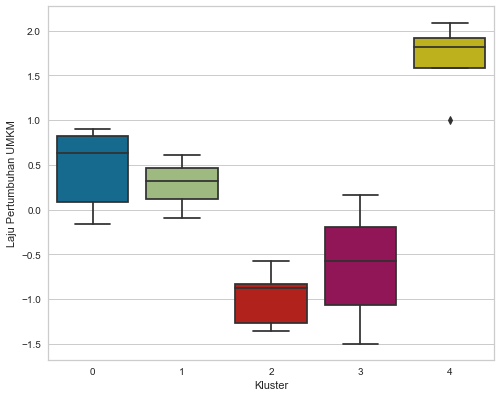

In [624]:
fig, ax = plt.subplots(1,1,figsize=(8,6.5))
sns.boxplot(x='Kluster', y='Laju Pertumbuhan UMKM', data=clustered_dataset_region, ax=ax)

Hasil klusterisasi menunjukkan bahwa daerah dengan kluster 4 memiliki laju pertumbuhan UMKM yang jauh lebih besar dibandingkan dengan kluster lainnya dengan kluster 1 dan kluster 3 memiliki laju pertumbuhan yang serupa. Menariknya, hasil analisis laju pertumbuhan UMKM memberikan hasil yang serupa dengan analisis profil kluster untuk jumlah UMKM, di mana daerah-daerah yang tergolong dalam kluster 2 memiliki nilai median yang paling rendah dengan sebaran data yang relatif lebih sempit. Artinya, kluster 2 menjadi kluster yang paling tertinggal dalam pengembangan UMKM, baik dari segi jumlah (kuantitatif) maupun laju perkembangan UMKM dibandingkan dengan kluster lain di Provinsi Jawa Barat.

In [625]:
# List Daerah Kluster 2
clustered_dataset_region.loc[clustered_dataset_region['Kluster'] == 2].index

Index(['KOTA SUKABUMI', 'KOTA CIREBON', 'KOTA CIMAHI', 'KOTA BOGOR',
       'KABUPATEN PURWAKARTA', 'KABUPATEN KUNINGAN', 'KABUPATEN SUMEDANG'],
      dtype='object', name='Daerah')

### Analisis Lanjutan Hasil Klusterisasi

In [626]:
cluster_region = cluster_dataset_region.copy()
cluster_region['Kluster'] = clustered_dataset_region['Kluster']
cluster_region.loc[cluster_region['Kluster'] == 2]

,Jumlah UMKM,Tingkat Kemiskinan,Tingkat Pengangguran,Laju Pertumbuhan UMKM,Kluster
Daerah,,,,,
KOTA SUKABUMI,53979,7.185,10.330,2799.4,2
KOTA CIREBON,54306,8.965,10.005,2816.4,2
KOTA CIMAHI,76833,4.750,10.695,3984.6,2
KOTA BOGOR,116656,6.225,10.920,6050.0,2
KABUPATEN PURWAKARTA,117790,7.875,10.400,6108.8,2
KABUPATEN KUNINGAN,128103,12.115,10.450,6643.6,2
KABUPATEN SUMEDANG,156884,9.655,8.795,8136.2,2


#### Analisis Kluster 2: Jumlah UMKM

In [627]:
jumlah_umkm_clusters = cluster_region.groupby('Kluster')['Jumlah UMKM'].sum()
jumlah_umkm_clusters

Kluster
0    2043045
1     805308
2     704551
3     893663
4    1810823
Name: Jumlah UMKM, dtype: int64

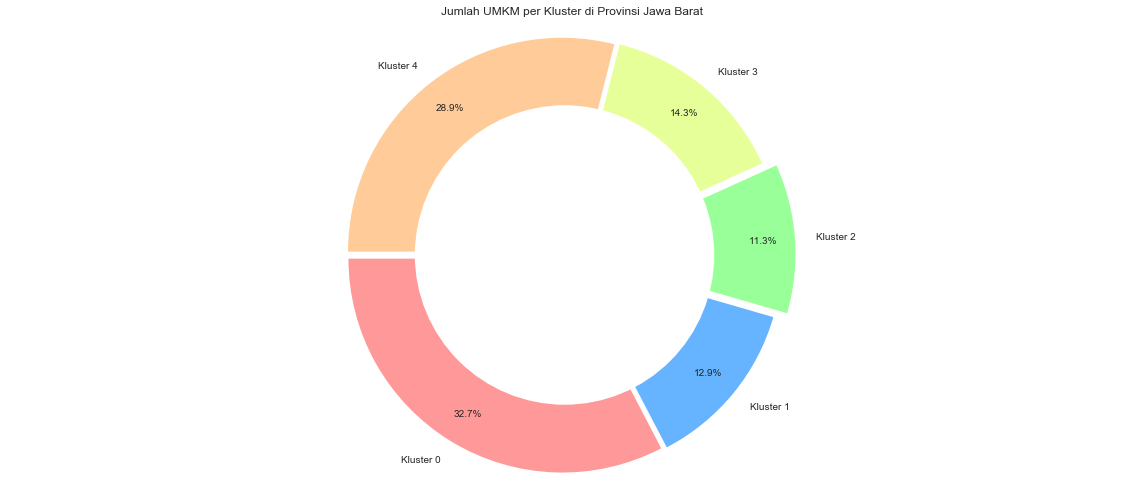

In [628]:
fig, ax = plt.subplots(1, 1, figsize=(16, 7))

colors = ['#ff9999','#66b3ff','#99ff99','#e7ff99', '#ffcc99']
labels = ['Kluster 0', 'Kluster 1', 'Kluster 2', 'Kluster 3', 'Kluster 4']
explodes = (0.02,0.02,0.08,0.02,0.02)
 
ax.pie(jumlah_umkm_clusters, colors = colors, labels=labels, autopct='%1.1f%%', 
       startangle=180, pctdistance=0.85, explode = explodes)

centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.axis('equal')  
plt.title('Jumlah UMKM per Kluster di Provinsi Jawa Barat')
plt.tight_layout()

Terlihat bahwa kluster 2 memiliki kontribusi jumlah UMKM yang paling rendah dibandingkan kluster lainnya, yaitu hanya 11.3%

#### Analisis Kluster 2: Tingkat Pengangguran

In [638]:
unemployment_data = cluster_region[['Tingkat Pengangguran', 'Kluster']].groupby('Kluster')['Tingkat Pengangguran'].mean()
unemployment_data

Kluster
0     9.745714
1     9.251667
2    10.227857
3     5.976667
4     9.313750
Name: Tingkat Pengangguran, dtype: float64

Terlihat bahwa kluster 2 juga memiliki tingkat pengangguran yang paling tinggi dibandingkan kluster lainnya, yaitu sebesar 10.2%. Dari analisis sebelumnya, diperoleh terdapat korelasi yang cukup kuat antara tingkat pengangguran dengan angka kemiskinan. Dengan demikian, dapat disimpulkan bahwa dari analisis sederhana ini diperoleh bahwa prioritas pengembangan UMKM yang lebih intensif dapat diberikan kepada daerah kluster 2 dengan harapan tingkat pengangguran dapat dikurangi dan turut membantu mengatasi permasalahan kemiskinan di Provinsi Jawa Barat.